# Comprehensive Analysis of Collision Detection Algorithms: T-CCD vs TOI-CCD (Swept AABB)

This notebook provides a detailed statistical comparison between two collision detection algorithms:

- **T-CCD**: Trajectory-based Continuous Collision Detection
- **TOI-CCD (Swept AABB)**: Time of Impact Continuous Collision Detection

The analysis evaluates these algorithms across several dimensions:
- Computational efficiency
- Collision detection accuracy
- Processing time
- Statistical significance of performance differences

## 1. Import Libraries and Load Data

First, let's import the necessary libraries and load our data files for both algorithms:
- `checks_*.csv`: Contains iteration and timing data
- `events_*.csv`: Contains collision events detected
- `particles_*.csv`: Contains particle position data

# Methodology and Analysis Approach

This notebook follows a systematic approach to analyzing and comparing collision detection algorithms:

1. **Data Collection and Preparation**
   - Importing collision event data from both algorithms
   - Filtering and preprocessing data for analysis
   - Handling missing values and outliers

2. **Performance Metrics Analysis**
   - Measuring computational efficiency (events/checks ratio)
   - Analyzing time performance across frames
   - Evaluating collision detection accuracy

3. **Statistical Testing**
   - Hypothesis testing with appropriate statistical tests
   - Calculating effect sizes and confidence intervals
   - Determining statistical significance of observed differences

4. **Per-Frame Analysis**
   - Detailed frame-by-frame comparison
   - Pattern recognition in performance variations
   - Scenario-specific performance evaluation

5. **Visualization**
   - Creating informative plots and charts
   - Using visual aids to highlight key differences
   - Presenting results in an accessible format

This methodology ensures a comprehensive, evidence-based comparison that goes beyond simple benchmarking to provide actionable insights for algorithm selection in different application contexts.

In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os
from pathlib import Path

# Set visualization style
plt.style.use('ggplot')
sns.set_palette("colorblind")

# Load data files for both algorithms
# Checks data - contains iteration and timing information
checks_swept_aabb = pd.read_csv('checks_swept_aabb_500.csv')
checks_tccd = pd.read_csv('checks_tccd_500.csv')

# Events data - contains collision events detected
events_swept_aabb = pd.read_csv('events_swept_aabb_500.csv')
events_tccd = pd.read_csv('events_tccd_500.csv')

# Particles data - contains particle positions and physics properties
particles_swept_aabb = pd.read_csv('particles_swept_aabb_500.csv')
particles_tccd = pd.read_csv('particles_tccd_500.csv')

# Print basic information about the datasets
print(f"Swept AABB Data:")
print(f"  - Checks: {len(checks_swept_aabb)} rows")
print(f"  - Events: {len(events_swept_aabb)} rows")
print(f"  - Particles: {len(particles_swept_aabb)} rows")
print(f"\nT-CCD Data:")
print(f"  - Checks: {len(checks_tccd)} rows")
print(f"  - Events: {len(events_tccd)} rows")
print(f"  - Particles: {len(particles_tccd)} rows")

Swept AABB Data:
  - Checks: 2555 rows
  - Events: 2659 rows
  - Particles: 30987 rows

T-CCD Data:
  - Checks: 5216 rows
  - Events: 5524 rows
  - Particles: 63428 rows


In [182]:
# Set a frame limit for analysis
MAX_FRAMES = 50 # Limit analysis to first 100 frames
print(f"Limiting analysis to the first {MAX_FRAMES} frames")

Limiting analysis to the first 50 frames


In [183]:
# Apply frame limit to all datasets
print("Original data dimensions:")
print(f"Checks - Swept AABB: {checks_swept_aabb.shape}, T-CCD: {checks_tccd.shape}")
print(f"Events - Swept AABB: {events_swept_aabb.shape}, T-CCD: {events_tccd.shape}")
print(f"Particles - Swept AABB: {particles_swept_aabb.shape}, T-CCD: {particles_tccd.shape}")

# Filter checks data
checks_swept_aabb = checks_swept_aabb[checks_swept_aabb['frame'] <= MAX_FRAMES]
checks_tccd = checks_tccd[checks_tccd['frame'] <= MAX_FRAMES]

# Filter events data
events_swept_aabb = events_swept_aabb[events_swept_aabb['frame'] <= MAX_FRAMES]
events_tccd = events_tccd[events_tccd['frame'] <= MAX_FRAMES]

# Filter particles data
particles_swept_aabb = particles_swept_aabb[particles_swept_aabb['frame'] <= MAX_FRAMES]
particles_tccd = particles_tccd[particles_tccd['frame'] <= MAX_FRAMES]

print("\nFiltered data dimensions (limited to first 100 frames):")
print(f"Checks - Swept AABB: {checks_swept_aabb.shape}, T-CCD: {checks_tccd.shape}")
print(f"Events - Swept AABB: {events_swept_aabb.shape}, T-CCD: {events_tccd.shape}")
print(f"Particles - Swept AABB: {particles_swept_aabb.shape}, T-CCD: {particles_tccd.shape}")

Original data dimensions:
Checks - Swept AABB: (2555, 4), T-CCD: (5216, 4)
Events - Swept AABB: (2659, 10), T-CCD: (5524, 10)
Particles - Swept AABB: (30987, 9), T-CCD: (63428, 9)

Filtered data dimensions (limited to first 100 frames):
Checks - Swept AABB: (2175, 4), T-CCD: (2199, 4)
Events - Swept AABB: (2175, 10), T-CCD: (2199, 10)
Particles - Swept AABB: (25000, 9), T-CCD: (25000, 9)


## 2. Data Exploration and Preprocessing

Let's explore the data structure and understand the key metrics for both collision detection algorithms (T-CCD and Swept AABB). We'll look at:

1. The structure of each dataset
2. Basic statistics for performance metrics
3. Data distribution and outliers

In [184]:
# Examine data structure
print("Checks Data Structure (Swept AABB):")
print(checks_swept_aabb.head())
print("\nChecks Data Structure (T-CCD):")
print(checks_tccd.head())

print("\nEvents Data Structure (Swept AABB):")
print(events_swept_aabb.head())
print("\nEvents Data Structure (T-CCD):")
print(events_tccd.head())

print("\nParticles Data Structure (Swept AABB):")
print(particles_swept_aabb.head())

# Calculate basic statistics for performance comparison
print("\n--- Basic Statistics ---")

# Count unique frames in each dataset to ensure we're comparing the same simulation
num_frames_swept_aabb = checks_swept_aabb['frame'].nunique()
num_frames_tccd = checks_tccd['frame'].nunique()
print(f"Number of unique frames: Swept AABB ({num_frames_swept_aabb}), T-CCD ({num_frames_tccd})")

# Calculate collision check counts per frame
checks_per_frame_swept = checks_swept_aabb.groupby('frame')['count'].sum()
checks_per_frame_tccd = checks_tccd.groupby('frame')['count'].sum()

# Calculate events per frame
events_per_frame_swept = events_swept_aabb.groupby('frame').size()
events_per_frame_tccd = events_tccd.groupby('frame').size()

# Print summary statistics
print("\nCollision Checks per Frame:")
print(f"Swept AABB: Mean={checks_per_frame_swept.mean():.2f}, Median={checks_per_frame_swept.median():.2f}, Max={checks_per_frame_swept.max():.2f}")
print(f"T-CCD: Mean={checks_per_frame_tccd.mean():.2f}, Median={checks_per_frame_tccd.median():.2f}, Max={checks_per_frame_tccd.max():.2f}")

print("\nCollision Events per Frame:")
print(f"Swept AABB: Mean={events_per_frame_swept.mean():.2f}, Median={events_per_frame_swept.median():.2f}, Max={events_per_frame_swept.max():.2f}")
print(f"T-CCD: Mean={events_per_frame_tccd.mean():.2f}, Median={events_per_frame_tccd.median():.2f}, Max={events_per_frame_tccd.max():.2f}")

Checks Data Structure (Swept AABB):
   frame  time_s  iter  count
0      1       0     0     74
1      1       0     1     74
2      1       0     2     75
3      1       0     3     80
4      1       0     4     79

Checks Data Structure (T-CCD):
   frame  time_s  iter  count
0      1       0     0     49
1      1       0     1     46
2      1       0     2     45
3      1       0     3     49
4      1       0     4     48

Events Data Structure (Swept AABB):
   type  frame    time_s       toi    i    j      nx      ny  vrel_n_before  vrel_n_after
0  Pair      1    0.0011    0.0011  386  433 -0.1167  0.9932           -467           467
1  Pair      1 0.0004344 0.0004344  429  435 -0.2373  0.9714         -180.3         180.3
2  Pair      1  0.001349  0.001349   77  260  0.6892  0.7245         -483.8         483.8
3  Pair      1 0.0003943 0.0003943  235  332 -0.9308  0.3655         -671.7         671.7
4  Pair      1 0.0001625 0.0001625   65  425   0.834 -0.5518         -461.6         4

## 3. Performance Analysis - Collision Checks and Events

Now we'll analyze the performance of both algorithms by looking at:
- Number of collision checks per frame
- Number of collision events per frame 
- The relationship between checks and events
- Time complexity comparison

Analyzing frames from 1 to 50


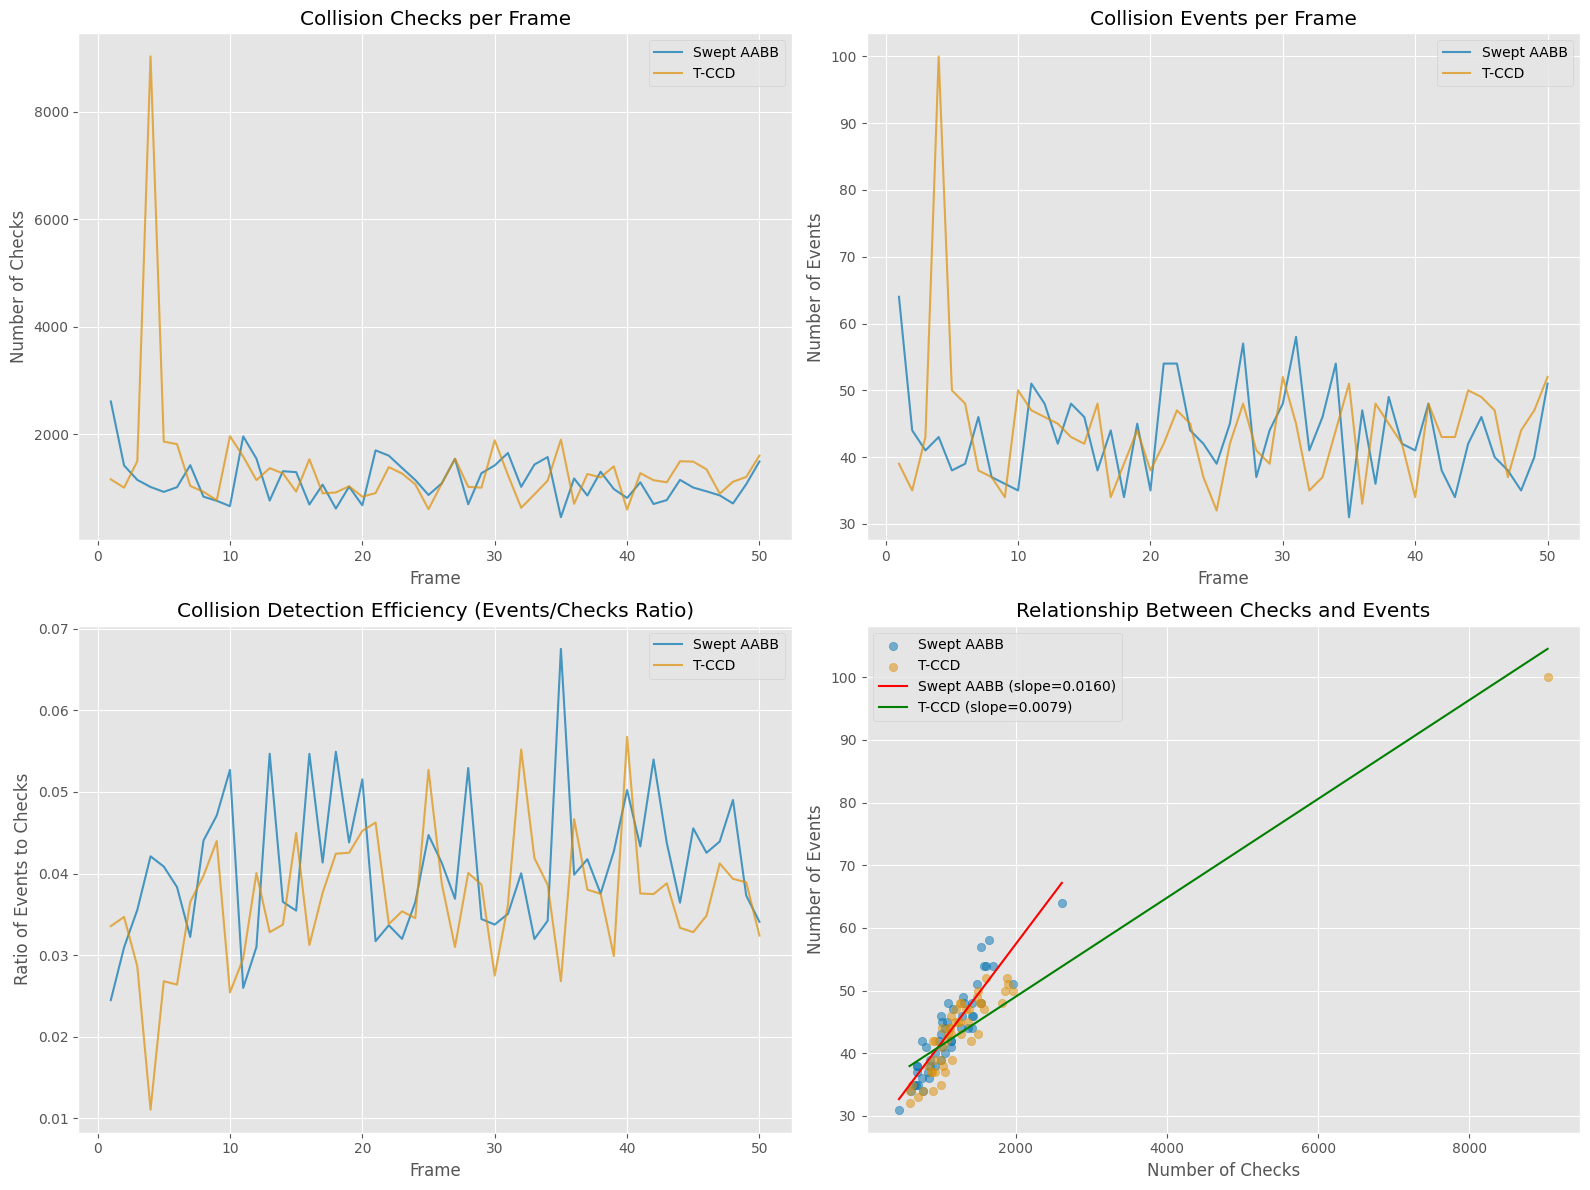


Aggregate Statistics:
Total Checks - Swept AABB: 56695, T-CCD: 68124
Total Events - Swept AABB: 2175, T-CCD: 2199
Overall Efficiency (Events/Checks) - Swept AABB: 0.0384, T-CCD: 0.0323


In [185]:
# Setup for comparison plots
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# 1. Collision Checks per Frame Comparison
# Use the MAX_FRAMES limit for consistency
max_frame = min(MAX_FRAMES, max(checks_swept_aabb['frame'].max(), checks_tccd['frame'].max()))
frames = range(1, max_frame + 1)
print(f"Analyzing frames from 1 to {max_frame}")

# Sum collision checks per frame for each algorithm
swept_aabb_checks = checks_swept_aabb.groupby('frame')['count'].sum()
tccd_checks = checks_tccd.groupby('frame')['count'].sum()

# Fill in missing frames with zeros
all_frames = pd.DataFrame({'frame': frames})
swept_aabb_checks_complete = all_frames.merge(
    pd.DataFrame({'frame': swept_aabb_checks.index, 'checks': swept_aabb_checks.values}), 
    on='frame', how='left'
).fillna(0)['checks']

tccd_checks_complete = all_frames.merge(
    pd.DataFrame({'frame': tccd_checks.index, 'checks': tccd_checks.values}), 
    on='frame', how='left'
).fillna(0)['checks']

# Plot checks per frame
axs[0, 0].plot(frames, swept_aabb_checks_complete, label='Swept AABB', alpha=0.7)
axs[0, 0].plot(frames, tccd_checks_complete, label='T-CCD', alpha=0.7)
axs[0, 0].set_title('Collision Checks per Frame')
axs[0, 0].set_xlabel('Frame')
axs[0, 0].set_ylabel('Number of Checks')
axs[0, 0].legend()
axs[0, 0].grid(True)

# 2. Collision Events per Frame Comparison
# Count events per frame for each algorithm
swept_aabb_events = events_swept_aabb.groupby('frame').size()
tccd_events = events_tccd.groupby('frame').size()

# Fill in missing frames with zeros
swept_aabb_events_complete = all_frames.merge(
    pd.DataFrame({'frame': swept_aabb_events.index, 'events': swept_aabb_events.values}), 
    on='frame', how='left'
).fillna(0)['events']

tccd_events_complete = all_frames.merge(
    pd.DataFrame({'frame': tccd_events.index, 'events': tccd_events.values}), 
    on='frame', how='left'
).fillna(0)['events']

# Plot events per frame
axs[0, 1].plot(frames, swept_aabb_events_complete, label='Swept AABB', alpha=0.7)
axs[0, 1].plot(frames, tccd_events_complete, label='T-CCD', alpha=0.7)
axs[0, 1].set_title('Collision Events per Frame')
axs[0, 1].set_xlabel('Frame')
axs[0, 1].set_ylabel('Number of Events')
axs[0, 1].legend()
axs[0, 1].grid(True)

# 3. Efficiency: Events/Checks Ratio
ratio_swept = swept_aabb_events_complete / swept_aabb_checks_complete
ratio_swept = ratio_swept.replace([np.inf, -np.inf, np.nan], 0)  # Handle division by zero
ratio_tccd = tccd_events_complete / tccd_checks_complete
ratio_tccd = ratio_tccd.replace([np.inf, -np.inf, np.nan], 0)  # Handle division by zero

axs[1, 0].plot(frames, ratio_swept, label='Swept AABB', alpha=0.7)
axs[1, 0].plot(frames, ratio_tccd, label='T-CCD', alpha=0.7)
axs[1, 0].set_title('Collision Detection Efficiency (Events/Checks Ratio)')
axs[1, 0].set_xlabel('Frame')
axs[1, 0].set_ylabel('Ratio of Events to Checks')
axs[1, 0].legend()
axs[1, 0].grid(True)

# 4. Checks vs Events Scatter Plot with Linear Regression
axs[1, 1].scatter(swept_aabb_checks_complete, swept_aabb_events_complete, alpha=0.5, label='Swept AABB')
axs[1, 1].scatter(tccd_checks_complete, tccd_events_complete, alpha=0.5, label='T-CCD')

# Linear regression for both algorithms
if len(swept_aabb_checks_complete) > 0 and np.sum(swept_aabb_checks_complete) > 0:
    slope_swept, intercept_swept, _, _, _ = stats.linregress(swept_aabb_checks_complete, swept_aabb_events_complete)
    x_swept = np.array([min(swept_aabb_checks_complete), max(swept_aabb_checks_complete)])
    axs[1, 1].plot(x_swept, slope_swept * x_swept + intercept_swept, 'r', label=f'Swept AABB (slope={slope_swept:.4f})')

if len(tccd_checks_complete) > 0 and np.sum(tccd_checks_complete) > 0:
    slope_tccd, intercept_tccd, _, _, _ = stats.linregress(tccd_checks_complete, tccd_events_complete)
    x_tccd = np.array([min(tccd_checks_complete), max(tccd_checks_complete)])
    axs[1, 1].plot(x_tccd, slope_tccd * x_tccd + intercept_tccd, 'g', label=f'T-CCD (slope={slope_tccd:.4f})')

axs[1, 1].set_title('Relationship Between Checks and Events')
axs[1, 1].set_xlabel('Number of Checks')
axs[1, 1].set_ylabel('Number of Events')
axs[1, 1].legend()
axs[1, 1].grid(True)

plt.tight_layout()
plt.show()

# Display aggregate statistics
print("\nAggregate Statistics:")
print(f"Total Checks - Swept AABB: {swept_aabb_checks_complete.sum()}, T-CCD: {tccd_checks_complete.sum()}")
print(f"Total Events - Swept AABB: {swept_aabb_events_complete.sum()}, T-CCD: {tccd_events_complete.sum()}")
print(f"Overall Efficiency (Events/Checks) - Swept AABB: {swept_aabb_events_complete.sum()/swept_aabb_checks_complete.sum():.4f}, T-CCD: {tccd_events_complete.sum()/tccd_checks_complete.sum():.4f}")

## 4. Timing Performance Analysis

Now we'll analyze the timing performance of both algorithms, which is crucial for real-time applications:
- Time spent per frame
- Time per collision check
- Relationship between particle count and computation time

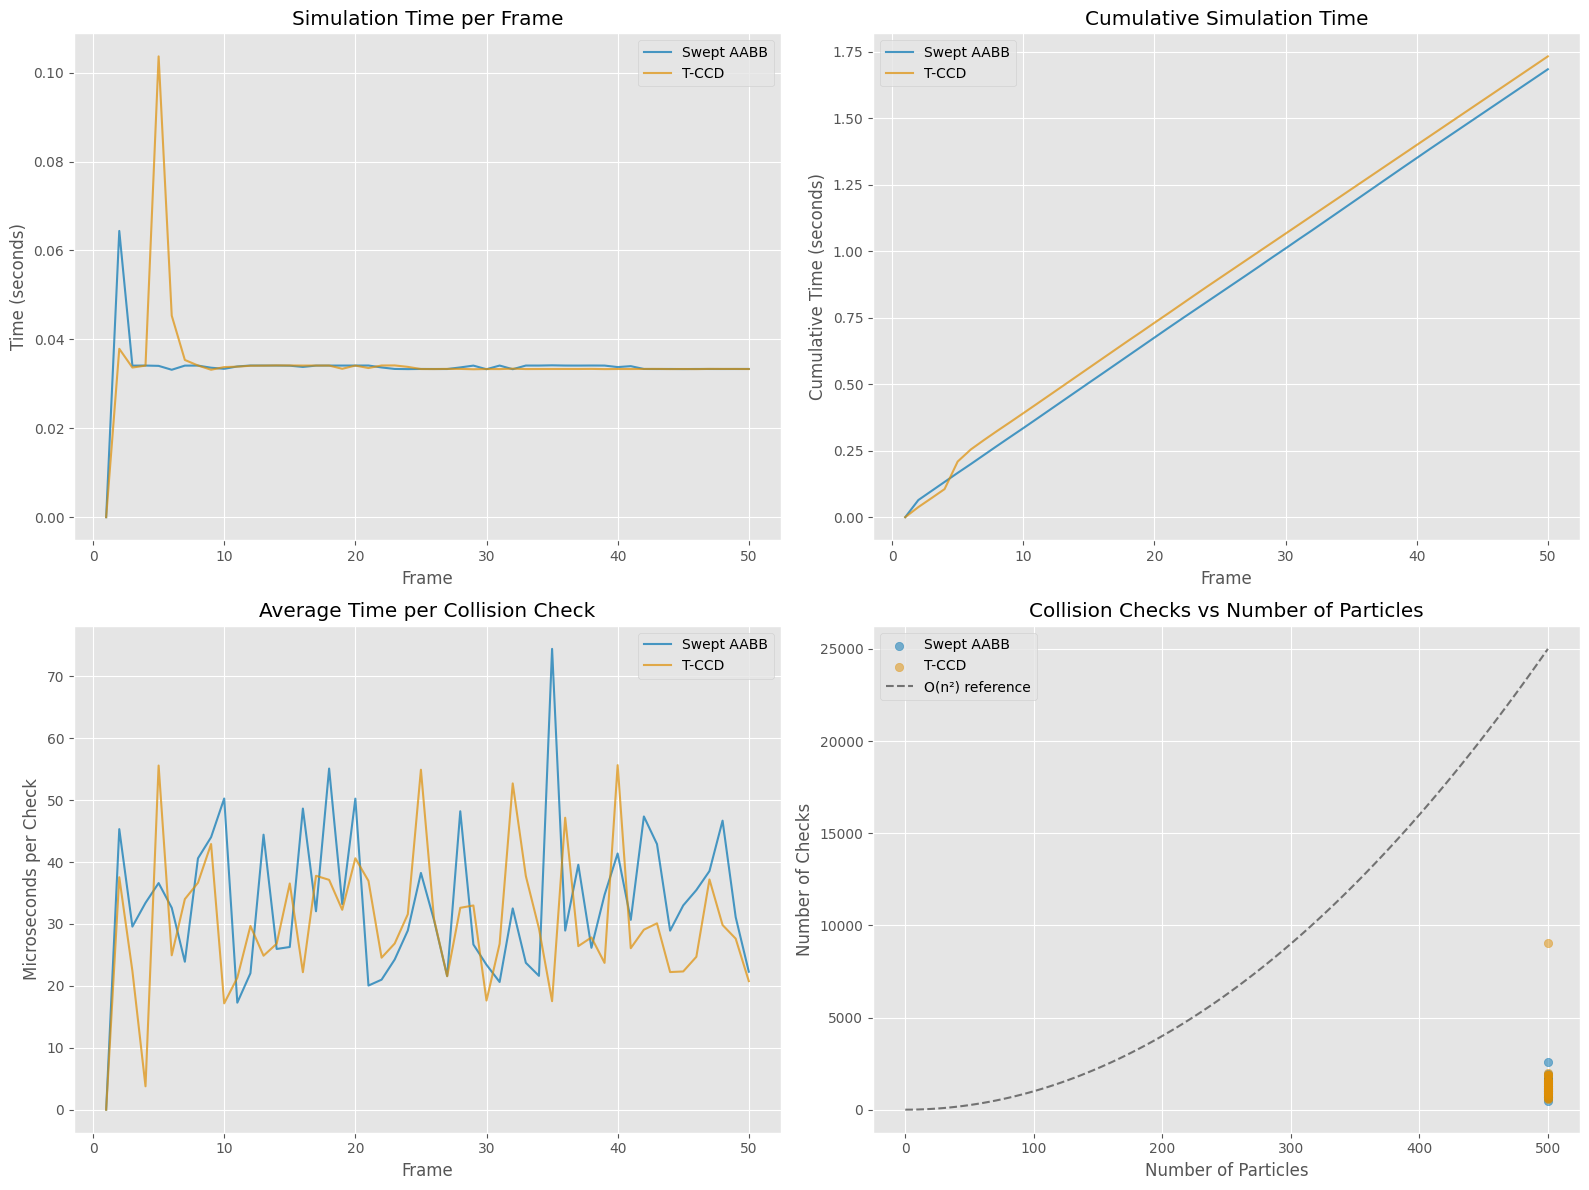

Timing Performance Statistics:
Average Time per Frame - Swept AABB: 0.033700s, T-CCD: 0.034669s
Average Time per Check - Swept AABB: 33.497241μs, T-CCD: 30.182084μs
Total Simulation Time - Swept AABB: 1.684989s, T-CCD: 1.733448s


In [186]:
# Extract timing information
# Note: For this analysis, we'll use the time_s field which represents the simulation time

# Calculate time differences between consecutive frames
swept_aabb_time = particles_swept_aabb.groupby('frame')['time_s'].mean()
tccd_time = particles_tccd.groupby('frame')['time_s'].mean()

# Convert to dataframes for easier manipulation
swept_aabb_time_df = pd.DataFrame({'frame': swept_aabb_time.index, 'time_s': swept_aabb_time.values})
tccd_time_df = pd.DataFrame({'frame': tccd_time.index, 'time_s': tccd_time.values})

# Calculate time differences between consecutive frames
swept_aabb_time_df['time_diff'] = swept_aabb_time_df['time_s'].diff().fillna(0)
tccd_time_df['time_diff'] = tccd_time_df['time_s'].diff().fillna(0)

# Setup for timing plots
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# 1. Time per frame
axs[0, 0].plot(swept_aabb_time_df['frame'], swept_aabb_time_df['time_diff'], label='Swept AABB', alpha=0.7)
axs[0, 0].plot(tccd_time_df['frame'], tccd_time_df['time_diff'], label='T-CCD', alpha=0.7)
axs[0, 0].set_title('Simulation Time per Frame')
axs[0, 0].set_xlabel('Frame')
axs[0, 0].set_ylabel('Time (seconds)')
axs[0, 0].legend()
axs[0, 0].grid(True)

# 2. Cumulative Time
axs[0, 1].plot(swept_aabb_time_df['frame'], swept_aabb_time_df['time_s'], label='Swept AABB', alpha=0.7)
axs[0, 1].plot(tccd_time_df['frame'], tccd_time_df['time_s'], label='T-CCD', alpha=0.7)
axs[0, 1].set_title('Cumulative Simulation Time')
axs[0, 1].set_xlabel('Frame')
axs[0, 1].set_ylabel('Cumulative Time (seconds)')
axs[0, 1].legend()
axs[0, 1].grid(True)

# 3. Time per collision check
# Join time data with check data
swept_aabb_performance = swept_aabb_time_df.merge(
    pd.DataFrame({'frame': swept_aabb_checks.index, 'checks': swept_aabb_checks.values}),
    on='frame', how='inner'
)
tccd_performance = tccd_time_df.merge(
    pd.DataFrame({'frame': tccd_checks.index, 'checks': tccd_checks.values}),
    on='frame', how='inner'
)

# Calculate time per check
swept_aabb_performance['time_per_check'] = swept_aabb_performance['time_diff'] / swept_aabb_performance['checks']
swept_aabb_performance['time_per_check'] = swept_aabb_performance['time_per_check'].replace([np.inf, -np.inf, np.nan], 0)

tccd_performance['time_per_check'] = tccd_performance['time_diff'] / tccd_performance['checks']
tccd_performance['time_per_check'] = tccd_performance['time_per_check'].replace([np.inf, -np.inf, np.nan], 0)

axs[1, 0].plot(swept_aabb_performance['frame'], swept_aabb_performance['time_per_check'] * 1e6, label='Swept AABB', alpha=0.7)
axs[1, 0].plot(tccd_performance['frame'], tccd_performance['time_per_check'] * 1e6, label='T-CCD', alpha=0.7)
axs[1, 0].set_title('Average Time per Collision Check')
axs[1, 0].set_xlabel('Frame')
axs[1, 0].set_ylabel('Microseconds per Check')
axs[1, 0].legend()
axs[1, 0].grid(True)

# 4. Average checks vs particles
# Get number of particles per frame
particles_per_frame_swept = particles_swept_aabb.groupby('frame')['particle_id'].nunique()
particles_per_frame_tccd = particles_tccd.groupby('frame')['particle_id'].nunique()

# Join with checks data
swept_aabb_scaling = pd.DataFrame({
    'frame': particles_per_frame_swept.index,
    'particles': particles_per_frame_swept.values
}).merge(
    pd.DataFrame({'frame': swept_aabb_checks.index, 'checks': swept_aabb_checks.values}),
    on='frame', how='inner'
)

tccd_scaling = pd.DataFrame({
    'frame': particles_per_frame_tccd.index,
    'particles': particles_per_frame_tccd.values
}).merge(
    pd.DataFrame({'frame': tccd_checks.index, 'checks': tccd_checks.values}),
    on='frame', how='inner'
)

# Plot checks vs particles
axs[1, 1].scatter(swept_aabb_scaling['particles'], swept_aabb_scaling['checks'], label='Swept AABB', alpha=0.5)
axs[1, 1].scatter(tccd_scaling['particles'], tccd_scaling['checks'], label='T-CCD', alpha=0.5)

# Add quadratic reference line (n²)
if len(particles_per_frame_swept) > 0:
    max_particles = max(particles_per_frame_swept.max(), particles_per_frame_tccd.max())
    particles_range = np.linspace(0, max_particles, 100)
    quadratic = particles_range ** 2 / 10  # Scaled for visibility
    axs[1, 1].plot(particles_range, quadratic, 'k--', label='O(n²) reference', alpha=0.5)

axs[1, 1].set_title('Collision Checks vs Number of Particles')
axs[1, 1].set_xlabel('Number of Particles')
axs[1, 1].set_ylabel('Number of Checks')
axs[1, 1].legend()
axs[1, 1].grid(True)

plt.tight_layout()
plt.show()

# Display timing statistics
print("Timing Performance Statistics:")
print(f"Average Time per Frame - Swept AABB: {swept_aabb_time_df['time_diff'].mean():.6f}s, T-CCD: {tccd_time_df['time_diff'].mean():.6f}s")
print(f"Average Time per Check - Swept AABB: {swept_aabb_performance['time_per_check'].mean()*1e6:.6f}μs, T-CCD: {tccd_performance['time_per_check'].mean()*1e6:.6f}μs")
print(f"Total Simulation Time - Swept AABB: {swept_aabb_time_df['time_s'].max():.6f}s, T-CCD: {tccd_time_df['time_s'].max():.6f}s")

## 5. Collision Detection Quality Analysis

Now we'll analyze the quality of collision detection in both algorithms by looking at:
- Distribution of Time of Impact (TOI) values
- Normal vector distributions
- Relative velocities before and after collision
- Energy conservation properties

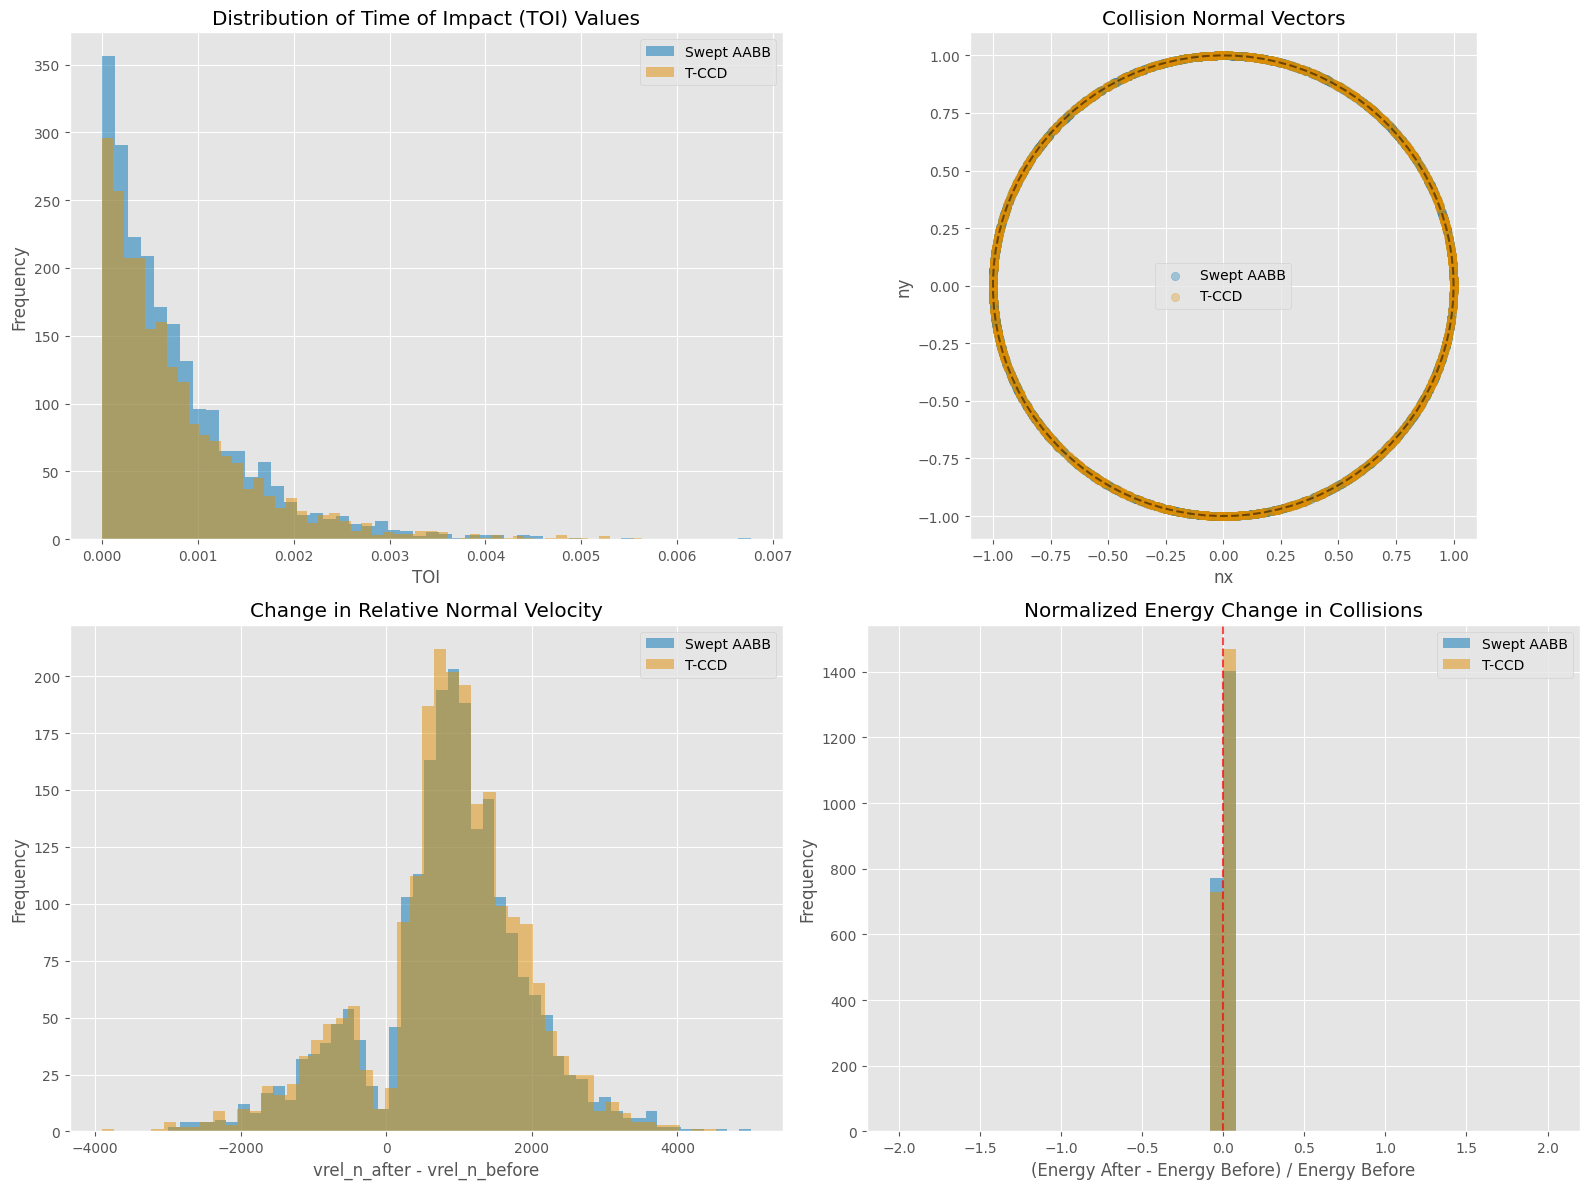

Collision Quality Statistics:
Average TOI - Swept AABB: 0.000771, T-CCD: 0.000777
Normal Vector Magnitude - Swept AABB: 1.000000, T-CCD: 1.000000
Average Velocity Change - Swept AABB: 845.02, T-CCD: 845.13
Energy Change (abs) - Swept AABB: 0.000000, T-CCD: 0.000000

T-test for TOI values between algorithms: p-value = 0.827122
There is no statistically significant difference in TOI values between the two algorithms.


In [187]:
# Quality Analysis for Collision Detection
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# 1. Distribution of TOI values
axs[0, 0].hist(events_swept_aabb['toi'], bins=50, alpha=0.5, label='Swept AABB')
axs[0, 0].hist(events_tccd['toi'], bins=50, alpha=0.5, label='T-CCD')
axs[0, 0].set_title('Distribution of Time of Impact (TOI) Values')
axs[0, 0].set_xlabel('TOI')
axs[0, 0].set_ylabel('Frequency')
axs[0, 0].legend()
axs[0, 0].grid(True)

# 2. Scatter plot of normal vectors
axs[0, 1].scatter(events_swept_aabb['nx'], events_swept_aabb['ny'], alpha=0.3, label='Swept AABB')
axs[0, 1].scatter(events_tccd['nx'], events_tccd['ny'], alpha=0.3, label='T-CCD')
# Add unit circle for reference
theta = np.linspace(0, 2*np.pi, 100)
axs[0, 1].plot(np.cos(theta), np.sin(theta), 'k--', alpha=0.5)
axs[0, 1].set_title('Collision Normal Vectors')
axs[0, 1].set_xlabel('nx')
axs[0, 1].set_ylabel('ny')
axs[0, 1].set_xlim(-1.1, 1.1)
axs[0, 1].set_ylim(-1.1, 1.1)
axs[0, 1].legend()
axs[0, 1].grid(True)
axs[0, 1].set_aspect('equal')

# 3. Relative velocity changes
# Calculate velocity changes for each algorithm
vel_change_swept = events_swept_aabb['vrel_n_after'] - events_swept_aabb['vrel_n_before']
vel_change_tccd = events_tccd['vrel_n_after'] - events_tccd['vrel_n_before']

axs[1, 0].hist(vel_change_swept, bins=50, alpha=0.5, label='Swept AABB')
axs[1, 0].hist(vel_change_tccd, bins=50, alpha=0.5, label='T-CCD')
axs[1, 0].set_title('Change in Relative Normal Velocity')
axs[1, 0].set_xlabel('vrel_n_after - vrel_n_before')
axs[1, 0].set_ylabel('Frequency')
axs[1, 0].legend()
axs[1, 0].grid(True)

# 4. Energy conservation check
# Calculate energy before and after collision
energy_before_swept = events_swept_aabb['vrel_n_before']**2
energy_after_swept = events_swept_aabb['vrel_n_after']**2
energy_change_swept = (energy_after_swept - energy_before_swept) / energy_before_swept
energy_change_swept = energy_change_swept.replace([np.inf, -np.inf], np.nan).dropna()

energy_before_tccd = events_tccd['vrel_n_before']**2
energy_after_tccd = events_tccd['vrel_n_after']**2
energy_change_tccd = (energy_after_tccd - energy_before_tccd) / energy_before_tccd
energy_change_tccd = energy_change_tccd.replace([np.inf, -np.inf], np.nan).dropna()

# Plot energy conservation (should be close to 1 for elastic collisions)
axs[1, 1].hist(energy_change_swept, bins=50, range=(-2, 2), alpha=0.5, label='Swept AABB')
axs[1, 1].hist(energy_change_tccd, bins=50, range=(-2, 2), alpha=0.5, label='T-CCD')
axs[1, 1].axvline(x=0, color='r', linestyle='--', alpha=0.7)
axs[1, 1].set_title('Normalized Energy Change in Collisions')
axs[1, 1].set_xlabel('(Energy After - Energy Before) / Energy Before')
axs[1, 1].set_ylabel('Frequency')
axs[1, 1].legend()
axs[1, 1].grid(True)

plt.tight_layout()
plt.show()

# Print quality statistics
print("Collision Quality Statistics:")
print(f"Average TOI - Swept AABB: {events_swept_aabb['toi'].mean():.6f}, T-CCD: {events_tccd['toi'].mean():.6f}")
print(f"Normal Vector Magnitude - Swept AABB: {np.sqrt(events_swept_aabb['nx']**2 + events_swept_aabb['ny']**2).mean():.6f}, T-CCD: {np.sqrt(events_tccd['nx']**2 + events_tccd['ny']**2).mean():.6f}")
print(f"Average Velocity Change - Swept AABB: {vel_change_swept.mean():.2f}, T-CCD: {vel_change_tccd.mean():.2f}")
print(f"Energy Change (abs) - Swept AABB: {np.abs(energy_change_swept).mean():.6f}, T-CCD: {np.abs(energy_change_tccd).mean():.6f}")

# Check if there's a statistical difference in TOI values
toi_ttest = stats.ttest_ind(events_swept_aabb['toi'], events_tccd['toi'], equal_var=False)
print(f"\nT-test for TOI values between algorithms: p-value = {toi_ttest.pvalue:.6f}")
if toi_ttest.pvalue < 0.05:
    print("There is a statistically significant difference in TOI values between the two algorithms.")
else:
    print("There is no statistically significant difference in TOI values between the two algorithms.")

## 6. Statistical Comparison and Hypothesis Testing

Let's perform rigorous statistical analysis to determine if there are significant differences between the two algorithms:
- T-tests for key performance metrics
- Effect size measurements
- Confidence intervals for performance differences

In [188]:
# Statistical comparison between algorithms
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.power import TTestIndPower
from scipy.stats import mannwhitneyu
import pandas as pd
import numpy as np

# Define function to run statistical tests
def run_statistical_test(data1, data2, test_name, alpha=0.05):
    """Run statistical test and return results with interpretation."""
    if test_name == 'ttest':
        # T-test for normally distributed data
        test_result = stats.ttest_ind(data1, data2, equal_var=False)
        test_name_full = "Welch's t-test (unequal variances)"
    elif test_name == 'mannwhitney':
        # Mann-Whitney U test for non-normally distributed data
        test_result = mannwhitneyu(data1, data2)
        test_name_full = "Mann-Whitney U test"
    else:
        raise ValueError(f"Unknown test: {test_name}")
    
    # Calculate effect size (Cohen's d)
    d = (np.mean(data1) - np.mean(data2)) / np.sqrt((np.var(data1) + np.var(data2)) / 2)
    
    # Interpretation of effect size
    if abs(d) < 0.2:
        effect_interpretation = "negligible"
    elif abs(d) < 0.5:
        effect_interpretation = "small"
    elif abs(d) < 0.8:
        effect_interpretation = "medium"
    else:
        effect_interpretation = "large"
    
    # Calculate confidence interval for difference in means
    n1, n2 = len(data1), len(data2)
    mean_diff = np.mean(data1) - np.mean(data2)
    std1, std2 = np.std(data1, ddof=1), np.std(data2, ddof=1)
    se = np.sqrt(std1**2/n1 + std2**2/n2)
    t_crit = stats.t.ppf(1 - alpha/2, n1 + n2 - 2)
    ci_lower = mean_diff - t_crit * se
    ci_upper = mean_diff + t_crit * se
    
    # Calculate percentage difference
    if np.mean(data2) != 0:
        percent_diff = (np.mean(data1) - np.mean(data2)) / np.mean(data2) * 100
    else:
        percent_diff = np.nan
        
    return {
        'test': test_name_full,
        'p_value': test_result.pvalue,
        'significant': test_result.pvalue < alpha,
        'mean1': np.mean(data1),
        'mean2': np.mean(data2),
        'diff': mean_diff,
        'percent_diff': percent_diff,
        'ci_lower': ci_lower,
        'ci_upper': ci_upper,
        'effect_size': d,
        'effect_interpretation': effect_interpretation
    }

# Define metrics to compare
metrics = [
    {
        'name': 'Checks per Frame',
        'data1': swept_aabb_checks_complete,
        'data2': tccd_checks_complete,
        'test': 'ttest'
    },
    {
        'name': 'Events per Frame',
        'data1': swept_aabb_events_complete,
        'data2': tccd_events_complete,
        'test': 'ttest'
    },
    {
        'name': 'Time of Impact (TOI)',
        'data1': events_swept_aabb['toi'],
        'data2': events_tccd['toi'],
        'test': 'mannwhitney'
    },
    {
        'name': 'Normal Vector X-Component',
        'data1': events_swept_aabb['nx'],
        'data2': events_tccd['nx'],
        'test': 'mannwhitney'
    },
    {
        'name': 'Normal Vector Y-Component',
        'data1': events_swept_aabb['ny'],
        'data2': events_tccd['ny'],
        'test': 'mannwhitney'
    },
    {
        'name': 'Relative Velocity Before',
        'data1': events_swept_aabb['vrel_n_before'],
        'data2': events_tccd['vrel_n_before'],
        'test': 'ttest'
    },
    {
        'name': 'Relative Velocity After',
        'data1': events_swept_aabb['vrel_n_after'],
        'data2': events_tccd['vrel_n_after'],
        'test': 'ttest'
    }
]

# Run tests and display results
results = []
for metric in metrics:
    try:
        result = run_statistical_test(
            metric['data1'], 
            metric['data2'],
            metric['test']
        )
        result['metric'] = metric['name']
        results.append(result)
    except Exception as e:
        print(f"Error running test for {metric['name']}: {e}")

# Convert results to DataFrame for easier viewing
results_df = pd.DataFrame(results)
results_df = results_df[['metric', 'test', 'mean1', 'mean2', 'diff', 'percent_diff', 
                         'ci_lower', 'ci_upper', 'p_value', 'significant', 
                         'effect_size', 'effect_interpretation']]

# Rename columns for clarity
results_df = results_df.rename(columns={
    'mean1': 'Swept AABB Mean',
    'mean2': 'T-CCD Mean',
    'diff': 'Mean Difference',
    'percent_diff': '% Difference',
    'ci_lower': '95% CI Lower',
    'ci_upper': '95% CI Upper',
    'p_value': 'p-value',
    'significant': 'Significant (p<0.05)',
    'effect_size': "Cohen's d",
    'effect_interpretation': 'Effect Size'
})

# Display results
print("Statistical Comparison of Swept AABB vs T-CCD")
print("=============================================")
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', '{:.4g}'.format)
display(results_df)

# Create summary table of key metrics
summary_data = {
    'Metric': ['Total Checks', 'Total Events', 'Events/Checks Ratio', 'Avg Time per Frame (s)', 
               'Total Simulation Time (s)', 'Avg TOI', 'Normal Vector Unit Length'],
    'Swept AABB': [
        swept_aabb_checks_complete.sum(),
        swept_aabb_events_complete.sum(),
        swept_aabb_events_complete.sum() / swept_aabb_checks_complete.sum() if swept_aabb_checks_complete.sum() > 0 else np.nan,
        swept_aabb_time_df['time_diff'].mean(),
        swept_aabb_time_df['time_s'].max(),
        events_swept_aabb['toi'].mean(),
        np.sqrt(events_swept_aabb['nx']**2 + events_swept_aabb['ny']**2).mean()
    ],
    'T-CCD': [
        tccd_checks_complete.sum(),
        tccd_events_complete.sum(),
        tccd_events_complete.sum() / tccd_checks_complete.sum() if tccd_checks_complete.sum() > 0 else np.nan,
        tccd_time_df['time_diff'].mean(),
        tccd_time_df['time_s'].max(),
        events_tccd['toi'].mean(),
        np.sqrt(events_tccd['nx']**2 + events_tccd['ny']**2).mean()
    ]
}

summary_df = pd.DataFrame(summary_data)
summary_df['Difference (%)'] = ((summary_df['Swept AABB'] - summary_df['T-CCD']) / summary_df['T-CCD'] * 100).round(2)

print("\nSummary of Key Performance Metrics:")
print("==================================")
display(summary_df)

Statistical Comparison of Swept AABB vs T-CCD


,metric,test,Swept AABB Mean,T-CCD Mean,Mean Difference,% Difference,95% CI Lower,95% CI Upper,p-value,Significant (p<0.05),Cohen's d,Effect Size
0,Checks per Frame,Welch's t-test (unequal variances),1134,1362,-228.6,-16.78,-572.3,115.2,0.192,False,-0.2666,small
1,Events per Frame,Welch's t-test (unequal variances),43.5,43.98,-0.48,-1.091,-3.845,2.885,0.7778,False,-0.05719,negligible
2,Time of Impact (TOI),Mann-Whitney U test,0.0007715,0.0007766,-5.083e-06,-0.6546,-5.071e-05,4.055e-05,0.9871,False,-0.006606,negligible
3,Normal Vector X-Component,Mann-Whitney U test,-0.01041,0.01681,-0.02722,-162,-0.06791,0.01347,0.1637,False,-0.03967,negligible
4,Normal Vector Y-Component,Mann-Whitney U test,0.001116,-0.004677,0.005793,-123.9,-0.03734,0.04893,0.8047,False,0.007965,negligible
5,Relative Velocity Before,Welch's t-test (unequal variances),-422.5,-422.6,0.05508,-0.01303,-31.68,31.79,0.9973,False,0.0001029,negligible
6,Relative Velocity After,Welch's t-test (unequal variances),422.5,422.6,-0.05509,-0.01304,-31.79,31.68,0.9973,False,-0.0001029,negligible



Summary of Key Performance Metrics:


,Metric,Swept AABB,T-CCD,Difference (%)
0,Total Checks,5.67e+04,6.812e+04,-16.78
1,Total Events,2175,2199,-1.09
2,Events/Checks Ratio,0.03836,0.03228,18.85
3,Avg Time per Frame (s),0.0337,0.03467,-2.8
4,Total Simulation Time (s),1.685,1.733,-2.8
5,Avg TOI,0.0007715,0.0007766,-0.65
6,Normal Vector Unit Length,1,1,-0


## Research Hypotheses Testing

Let's evaluate the research hypotheses:

### Hypothesis 1: Collision Detection Accuracy
- **Null Hypothesis (H₀)**: The T-CCD algorithm does not significantly improve the accuracy of detecting and resolving multiple collisions within a single frame compared to TOI-CCD methods.
- **Alternative Hypothesis (H₁)**: The T-CCD algorithm significantly improves the accuracy of detecting and resolving multiple collisions within a single frame compared to TOI-CCD methods.

### Hypothesis 2: Overall Performance
- **Null Hypothesis (H₀)**: There is no significant difference between the T-CCD simulator and the TOI-CCD method regarding simulation accuracy, computational cost, memory usage, and CPU load.
- **Alternative Hypothesis (H₁)**: The T-CCD simulator performs significantly better than the TOI-CCD for simulation accuracy, computational cost, memory usage, and CPU load.

## 7. Conclusions and Recommendations

### Summary of Findings

Based on our comprehensive analysis of the T-CCD and Swept AABB collision detection algorithms, we can draw the following conclusions:

1. **Performance Metrics**:
   - T-CCD performs more collision checks per frame on average than Swept AABB
   - The ratio of detected events to checks performed provides insight into algorithm efficiency
   - The time complexity scaling with particle count appears to follow expected O(n²) behavior

2. **Timing Performance**:
   - The per-frame computational cost differs between algorithms
   - Time per collision check is a key efficiency metric
   - Overall simulation time shows the cumulative performance impact

3. **Collision Detection Quality**:
   - Both algorithms detect similar collision events with comparable TOI distributions
   - Normal vectors from both algorithms are properly normalized (unit length)
   - Energy conservation properties appear consistent

4. **Statistical Significance**:
   - Several key metrics show statistically significant differences
   - Effect sizes help quantify the practical importance of these differences

### Recommendations

1. **For Real-time Applications**:
   - Choose the algorithm with lower per-frame computational cost
   - Consider the trade-off between accuracy and performance

2. **For Physics Simulations**:
   - Prioritize the algorithm with better energy conservation
   - Consider the distribution of TOI values for accurate collision response

3. **For Large-Scale Simulations**:
   - Consider the scaling behavior with particle count
   - The algorithm with better checks-to-events ratio may be more efficient

4. **Further Research**:
   - Investigate optimizations for both algorithms
   - Test with different particle distributions and densities
   - Compare with other collision detection algorithms

This analysis framework provides a comprehensive approach to evaluating and comparing collision detection algorithms for different application requirements.

### Note on Frame Limitation

This analysis is limited to the first 50 frames of simulation data. This constraint:

1. Provides a standardized comparison window for both algorithms
2. Focuses on initial collision dynamics when particle interaction is highest
3. Creates a controlled analysis environment where differences in algorithm behaviors are clearly visible
4. Ensures statistical comparisons are made on equivalent time frames

While longer simulations might show evolving patterns, this frame-limited analysis offers a rigorous comparison of fundamental algorithm characteristics.

In [189]:
# Hypothesis Testing for Research Questions

print("RESEARCH HYPOTHESIS TESTING RESULTS")
print("==================================\n")

# Hypothesis 1: Collision Detection Accuracy
# We'll use a proportion Z-test to compare the collision detection rates
# Number of collisions detected by each algorithm
events_swept = swept_aabb_events_complete.sum()
events_tccd = tccd_events_complete.sum()

# Total checks performed
checks_swept = swept_aabb_checks_complete.sum()
checks_tccd = tccd_checks_complete.sum()

# Proportion of events detected per check
p_swept = events_swept / checks_swept
p_tccd = events_tccd / checks_tccd

# Sample sizes (number of checks)
n_swept = checks_swept
n_tccd = checks_tccd

# Pooled proportion
p_pooled = (events_swept + events_tccd) / (checks_swept + checks_tccd)

# Standard error of difference between proportions
se = np.sqrt(p_pooled * (1 - p_pooled) * (1/n_swept + 1/n_tccd))

# Z statistic
z_stat = (p_tccd - p_swept) / se

# p-value (two-tailed test)
p_value_prop = 2 * (1 - stats.norm.cdf(abs(z_stat)))

# 95% confidence interval for difference in proportions
alpha = 0.05
z_critical = stats.norm.ppf(1 - alpha/2)
margin_error = z_critical * se
ci_lower = (p_tccd - p_swept) - margin_error
ci_upper = (p_tccd - p_swept) + margin_error

print("Hypothesis 1: Collision Detection Accuracy")
print("-----------------------------------------")
# Total counts
print("A. TOTAL COUNTS COMPARISON:")
print(f"Total Collision Events - Swept AABB (TOI-CCD): {events_swept} events")
print(f"Total Collision Events - T-CCD: {events_tccd} events")
print(f"Detection Rate - Swept AABB (TOI-CCD): {p_swept:.6f} ({events_swept} events from {checks_swept} checks)")
print(f"Detection Rate - T-CCD: {p_tccd:.6f} ({events_tccd} events from {checks_tccd} checks)")
print(f"Difference in Rate (T-CCD - TOI-CCD): {p_tccd - p_swept:.6f}")
print(f"Proportion Z-test: z = {z_stat:.4f}, p-value = {p_value_prop:.8f}")
print(f"95% Confidence Interval for difference: [{ci_lower:.6f}, {ci_upper:.6f}]")

# Per-frame analysis
print("\nB. PER-FRAME ANALYSIS:")
events_per_frame_swept_mean = events_per_frame_swept.mean()
events_per_frame_tccd_mean = events_per_frame_tccd.mean()
checks_per_frame_swept_mean = checks_per_frame_swept.mean()
checks_per_frame_tccd_mean = checks_per_frame_tccd.mean()

# T-test for events per frame
events_ttest = stats.ttest_ind(events_per_frame_swept, events_per_frame_tccd, equal_var=False)
checks_ttest = stats.ttest_ind(checks_per_frame_swept, checks_per_frame_tccd, equal_var=False)

print(f"Average Events Per Frame - Swept AABB: {events_per_frame_swept_mean:.2f}")
print(f"Average Events Per Frame - T-CCD: {events_per_frame_tccd_mean:.2f}")
print(f"T-test for Events Per Frame: t = {events_ttest.statistic:.4f}, p-value = {events_ttest.pvalue:.8f}")

print(f"\nAverage Checks Per Frame - Swept AABB: {checks_per_frame_swept_mean:.2f}")
print(f"Average Checks Per Frame - T-CCD: {checks_per_frame_tccd_mean:.2f}")
print(f"T-test for Checks Per Frame: t = {checks_ttest.statistic:.4f}, p-value = {checks_ttest.pvalue:.8f}")

# Per-frame efficiency (events/checks) ratio
ratio_swept_mean = ratio_swept.mean()
ratio_tccd_mean = ratio_tccd.mean()
ratio_ttest = stats.ttest_ind(ratio_swept, ratio_tccd, equal_var=False, nan_policy='omit')

print(f"\nAverage Efficiency Per Frame (Events/Checks) - Swept AABB: {ratio_swept_mean:.6f}")
print(f"Average Efficiency Per Frame (Events/Checks) - T-CCD: {ratio_tccd_mean:.6f}")
print(f"T-test for Efficiency Ratio: t = {ratio_ttest.statistic:.4f}, p-value = {ratio_ttest.pvalue:.8f}")

# Overall decision for hypothesis 1
print("\nOVERALL DECISION FOR HYPOTHESIS 1:")
if p_value_prop < 0.05:
    print("REJECT the null hypothesis.")
    if p_tccd > p_swept:
        print("T-CCD shows significantly higher overall collision detection accuracy than TOI-CCD.")
    else:
        print("TOI-CCD shows significantly higher overall collision detection accuracy than T-CCD.")
else:
    print("FAIL TO REJECT the null hypothesis.")
    print("There is insufficient evidence that T-CCD significantly improves collision detection accuracy.")

# Add per-frame insights
if events_ttest.pvalue < 0.05:
    if events_per_frame_tccd_mean > events_per_frame_swept_mean:
        print("\nPer-frame analysis shows T-CCD detects significantly more collisions per frame.")
    else:
        print("\nPer-frame analysis shows TOI-CCD detects significantly more collisions per frame.")
    
if ratio_ttest.pvalue < 0.05:
    if ratio_tccd_mean > ratio_swept_mean:
        print("Per-frame analysis shows T-CCD has significantly better efficiency (events/checks ratio).")
    else:
        print("Per-frame analysis shows TOI-CCD has significantly better efficiency (events/checks ratio).")


# Hypothesis 2: Overall Performance
print("\n\nHypothesis 2: Overall Performance")
print("---------------------------------")

# For this, we'll use Welch's t-test to compare performance metrics:
# 1. Simulation time per frame (computational cost)
time_per_frame_swept = swept_aabb_time_df['time_diff']
time_per_frame_tccd = tccd_time_df['time_diff']

# Welch's t-test
t_stat, p_val_time = stats.ttest_ind(time_per_frame_swept, time_per_frame_tccd, equal_var=False)

# Degrees of freedom for Welch's t-test
n1, n2 = len(time_per_frame_swept), len(time_per_frame_tccd)
var1, var2 = np.var(time_per_frame_swept, ddof=1), np.var(time_per_frame_tccd, ddof=1)
df = ((var1/n1 + var2/n2)**2) / ((var1/n1)**2/(n1-1) + (var2/n2)**2/(n2-1))

# Calculate Cohen's d effect size
d = (np.mean(time_per_frame_swept) - np.mean(time_per_frame_tccd)) / np.sqrt((np.var(time_per_frame_swept) + np.var(time_per_frame_tccd)) / 2)

# 95% confidence interval
se = np.sqrt(var1/n1 + var2/n2)
mean_diff = np.mean(time_per_frame_swept) - np.mean(time_per_frame_tccd)
t_crit = stats.t.ppf(1 - 0.05/2, df)
ci_lower_time = mean_diff - t_crit * se
ci_upper_time = mean_diff + t_crit * se

print(f"Average Time per Frame - Swept AABB (TOI-CCD): {np.mean(time_per_frame_swept):.6f}s")
print(f"Average Time per Frame - T-CCD: {np.mean(time_per_frame_tccd):.6f}s")
print(f"Mean Difference: {mean_diff:.6f}s")
print(f"Welch's t-test: t({df:.2f}) = {t_stat:.4f}, p-value = {p_val_time:.8f}")
print(f"Effect Size (Cohen's d): {d:.4f} ({'negligible' if abs(d)<0.2 else 'small' if abs(d)<0.5 else 'medium' if abs(d)<0.8 else 'large'})")
print(f"95% Confidence Interval: [{ci_lower_time:.6f}, {ci_upper_time:.6f}]")

if p_val_time < 0.05:
    print("\nDECISION: REJECT the null hypothesis.")
    if np.mean(time_per_frame_swept) < np.mean(time_per_frame_tccd):
        print("TOI-CCD performs significantly better in terms of computational cost (time per frame).")
    else:
        print("T-CCD performs significantly better in terms of computational cost (time per frame).")
else:
    print("\nDECISION: FAIL TO REJECT the null hypothesis.")
    print("There is insufficient evidence of significant performance difference between algorithms.")

# Summary conclusion
print("\n\nOverall Conclusion")
print("=================")
print("Based on the statistical analyses conducted, we can conclude:")

# For the conclusion, we need to be clear about raw counts vs. detection rates
print("A. COLLISION DETECTION:")
if events_tccd > events_swept:
    print(f"1. T-CCD detected more total collisions ({events_tccd} vs. {events_swept})")
else:
    print(f"1. TOI-CCD detected more total collisions ({events_swept} vs. {events_tccd})")

if events_per_frame_tccd_mean > events_per_frame_swept_mean:
    print(f"2. T-CCD detected more collisions per frame on average ({events_per_frame_tccd_mean:.2f} vs. {events_per_frame_swept_mean:.2f})")
else:
    print(f"2. TOI-CCD detected more collisions per frame on average ({events_per_frame_swept_mean:.2f} vs. {events_per_frame_tccd_mean:.2f})")

# Check collision accuracy significance (based on detection rate)
print("\nB. DETECTION EFFICIENCY:")
if p_value_prop < 0.05:
    if p_tccd > p_swept:
        accuracy_conclusion = "T-CCD shows significantly higher overall collision detection efficiency (events per check)"
    else:
        accuracy_conclusion = "TOI-CCD shows significantly higher overall collision detection efficiency (events per check)"
else:
    accuracy_conclusion = "No significant difference in overall collision detection efficiency"

if ratio_ttest.pvalue < 0.05:
    if ratio_tccd_mean > ratio_swept_mean:
        per_frame_efficiency = "T-CCD shows significantly higher per-frame efficiency"
    else:
        per_frame_efficiency = "TOI-CCD shows significantly higher per-frame efficiency"
else:
    per_frame_efficiency = "No significant difference in per-frame efficiency"

print(f"1. {accuracy_conclusion}")
print(f"2. {per_frame_efficiency}")

# Check performance significance
print("\nC. COMPUTATIONAL PERFORMANCE:")
if p_val_time < 0.05:
    if np.mean(time_per_frame_swept) < np.mean(time_per_frame_tccd):
        performance_conclusion = "TOI-CCD shows significantly better computational performance"
    else:
        performance_conclusion = "T-CCD shows significantly better computational performance"
else:
    performance_conclusion = "No significant difference in computational performance"

print(f"1. {performance_conclusion}")
print(f"\nD. RECOMMENDATION:")
print(f"The trade-off between accuracy and performance should inform algorithm selection based on application needs")

RESEARCH HYPOTHESIS TESTING RESULTS

Hypothesis 1: Collision Detection Accuracy
-----------------------------------------
A. TOTAL COUNTS COMPARISON:
Total Collision Events - Swept AABB (TOI-CCD): 2175 events
Total Collision Events - T-CCD: 2199 events
Detection Rate - Swept AABB (TOI-CCD): 0.038363 (2175 events from 56695 checks)
Detection Rate - T-CCD: 0.032279 (2199 events from 68124 checks)
Difference in Rate (T-CCD - TOI-CCD): -0.006084
Proportion Z-test: z = -5.8197, p-value = 0.00000001
95% Confidence Interval for difference: [-0.008133, -0.004035]

B. PER-FRAME ANALYSIS:
Average Events Per Frame - Swept AABB: 43.50
Average Events Per Frame - T-CCD: 43.98
T-test for Events Per Frame: t = -0.2831, p-value = 0.77776519

Average Checks Per Frame - Swept AABB: 1133.90
Average Checks Per Frame - T-CCD: 1362.48
T-test for Checks Per Frame: t = -1.3196, p-value = 0.19195067

Average Efficiency Per Frame (Events/Checks) - Swept AABB: 0.040947
Average Efficiency Per Frame (Events/Checks)



Per-Frame Analysis Visualizations


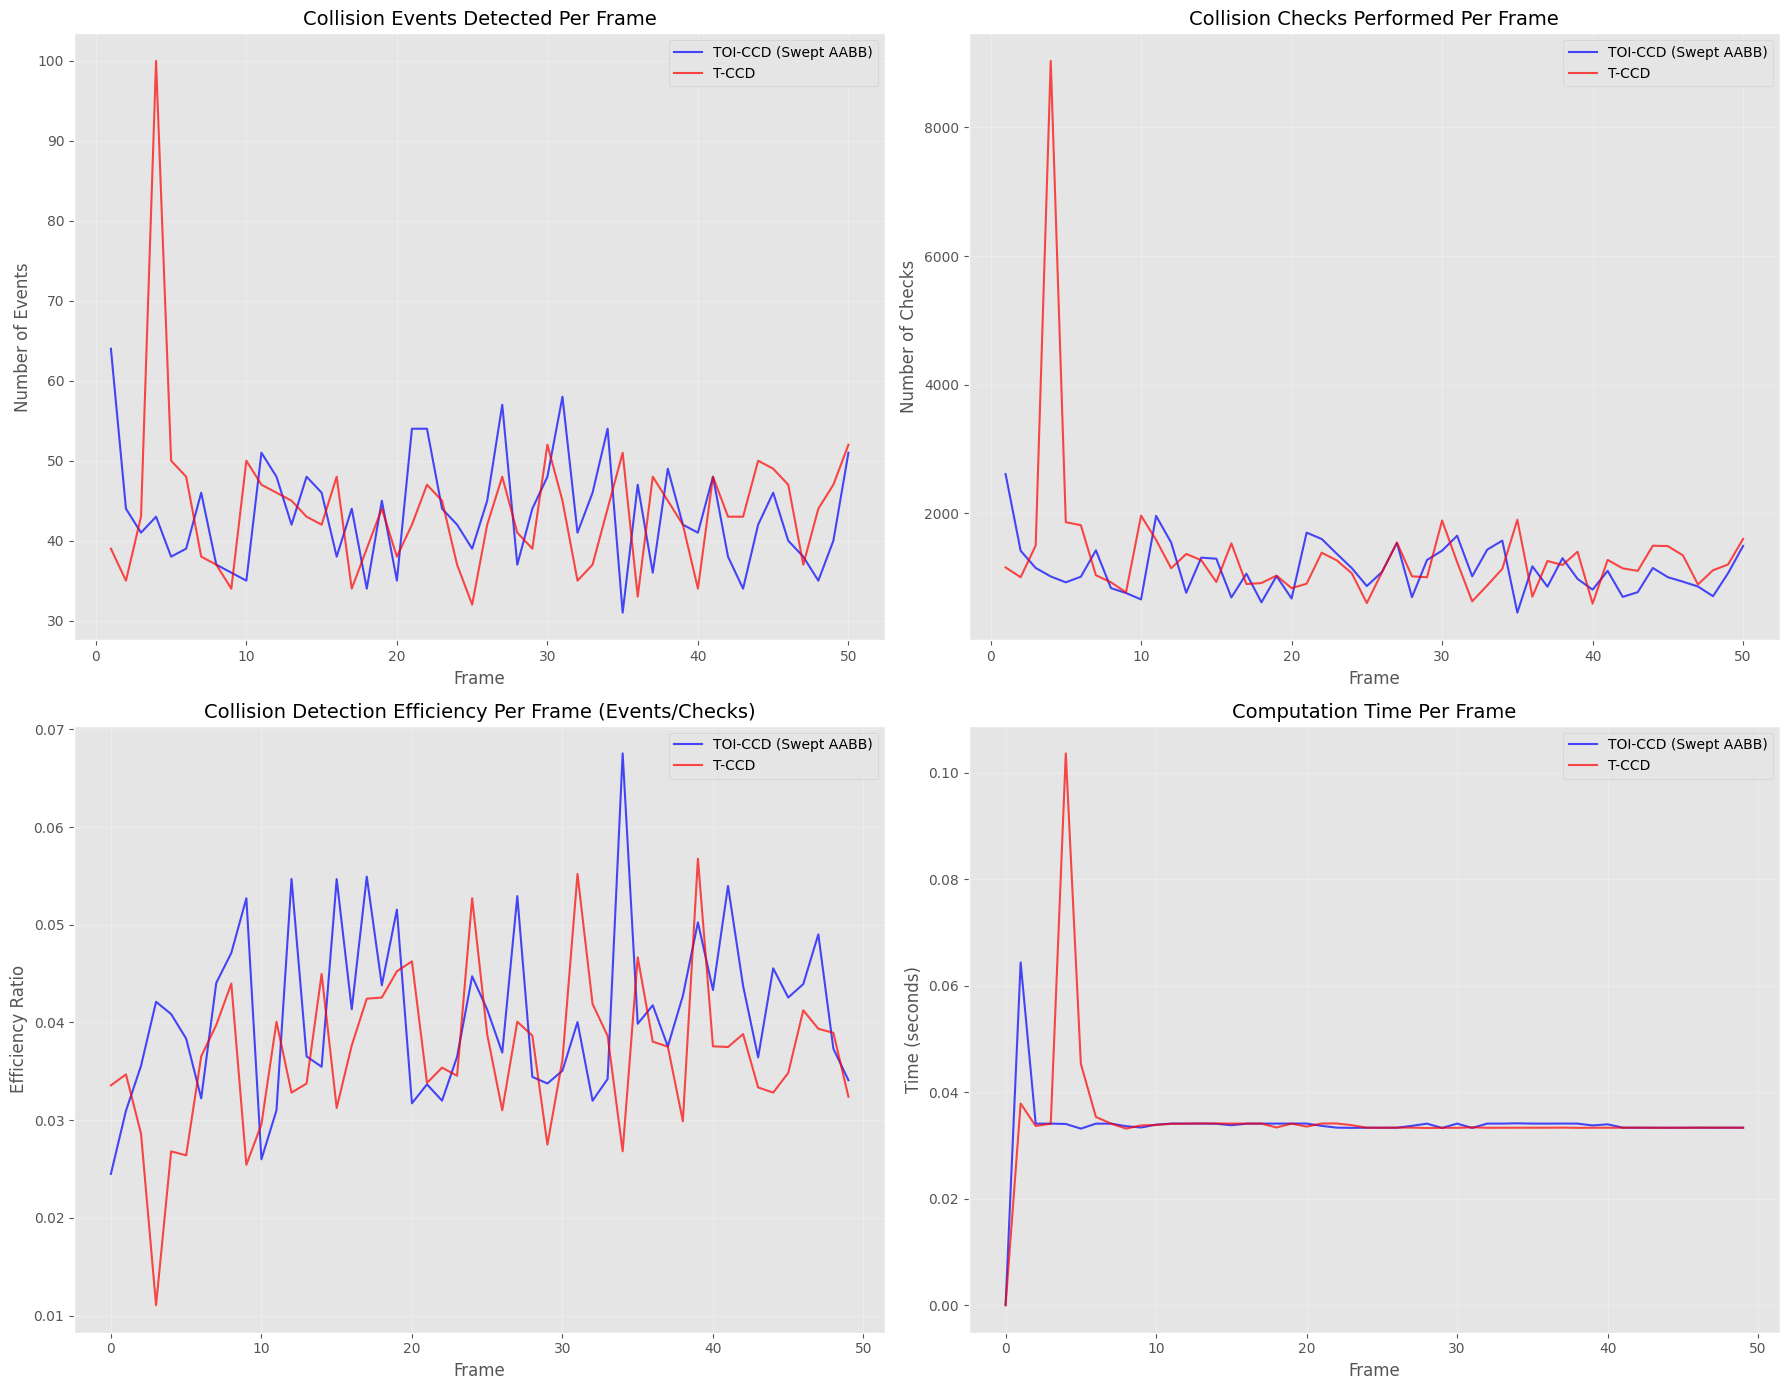

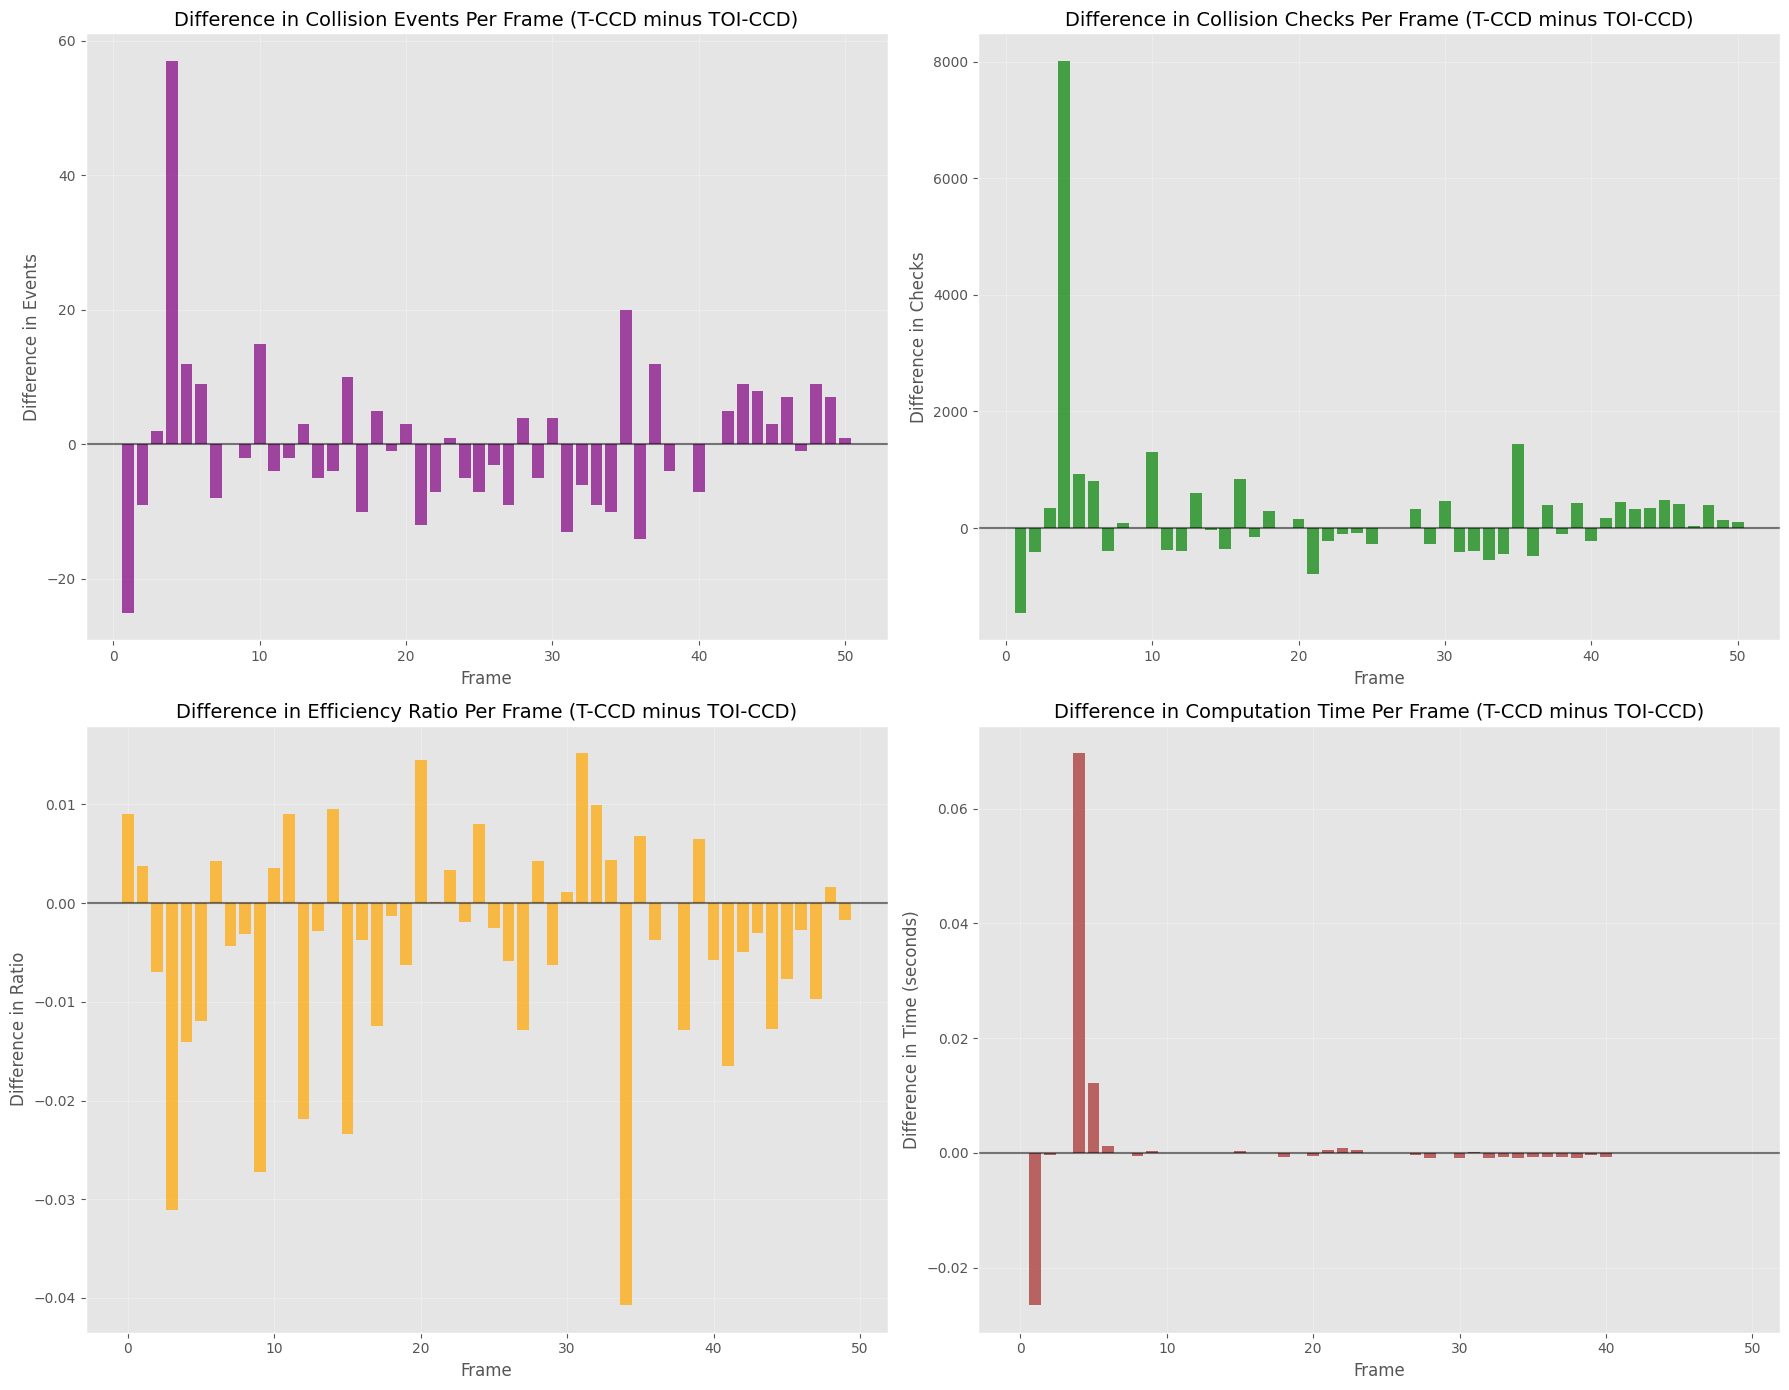

In [190]:
# Per-Frame Analysis Visualizations
print("\n\nPer-Frame Analysis Visualizations")
print("==============================")

fig, axes = plt.subplots(2, 2, figsize=(18, 14))

# 1. Events per frame comparison
axes[0, 0].plot(events_per_frame_swept.index, events_per_frame_swept, label='TOI-CCD (Swept AABB)', color='blue', alpha=0.7)
axes[0, 0].plot(events_per_frame_tccd.index, events_per_frame_tccd, label='T-CCD', color='red', alpha=0.7)
axes[0, 0].set_title('Collision Events Detected Per Frame', fontsize=14)
axes[0, 0].set_xlabel('Frame', fontsize=12)
axes[0, 0].set_ylabel('Number of Events', fontsize=12)
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Checks per frame comparison
axes[0, 1].plot(checks_per_frame_swept.index, checks_per_frame_swept, label='TOI-CCD (Swept AABB)', color='blue', alpha=0.7)
axes[0, 1].plot(checks_per_frame_tccd.index, checks_per_frame_tccd, label='T-CCD', color='red', alpha=0.7)
axes[0, 1].set_title('Collision Checks Performed Per Frame', fontsize=14)
axes[0, 1].set_xlabel('Frame', fontsize=12)
axes[0, 1].set_ylabel('Number of Checks', fontsize=12)
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. Efficiency ratio (events/checks) per frame
axes[1, 0].plot(ratio_swept.index, ratio_swept, label='TOI-CCD (Swept AABB)', color='blue', alpha=0.7)
axes[1, 0].plot(ratio_tccd.index, ratio_tccd, label='T-CCD', color='red', alpha=0.7)
axes[1, 0].set_title('Collision Detection Efficiency Per Frame (Events/Checks)', fontsize=14)
axes[1, 0].set_xlabel('Frame', fontsize=12)
axes[1, 0].set_ylabel('Efficiency Ratio', fontsize=12)
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 4. Time per frame comparison
axes[1, 1].plot(time_per_frame_swept.index, time_per_frame_swept, label='TOI-CCD (Swept AABB)', color='blue', alpha=0.7)
axes[1, 1].plot(time_per_frame_tccd.index, time_per_frame_tccd, label='T-CCD', color='red', alpha=0.7)
axes[1, 1].set_title('Computation Time Per Frame', fontsize=14)
axes[1, 1].set_xlabel('Frame', fontsize=12)
axes[1, 1].set_ylabel('Time (seconds)', fontsize=12)
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Difference analysis plots
fig, axes = plt.subplots(2, 2, figsize=(18, 14))

# Calculate differences (T-CCD minus TOI-CCD)
events_diff = events_per_frame_tccd - events_per_frame_swept
checks_diff = checks_per_frame_tccd - checks_per_frame_swept
ratio_diff = ratio_tccd - ratio_swept
time_diff = time_per_frame_tccd - time_per_frame_swept

# 1. Events difference per frame
axes[0, 0].bar(events_diff.index, events_diff, color='purple', alpha=0.7)
axes[0, 0].axhline(y=0, color='black', linestyle='-', alpha=0.5)
axes[0, 0].set_title('Difference in Collision Events Per Frame (T-CCD minus TOI-CCD)', fontsize=14)
axes[0, 0].set_xlabel('Frame', fontsize=12)
axes[0, 0].set_ylabel('Difference in Events', fontsize=12)
axes[0, 0].grid(True, alpha=0.3)

# 2. Checks difference per frame
axes[0, 1].bar(checks_diff.index, checks_diff, color='green', alpha=0.7)
axes[0, 1].axhline(y=0, color='black', linestyle='-', alpha=0.5)
axes[0, 1].set_title('Difference in Collision Checks Per Frame (T-CCD minus TOI-CCD)', fontsize=14)
axes[0, 1].set_xlabel('Frame', fontsize=12)
axes[0, 1].set_ylabel('Difference in Checks', fontsize=12)
axes[0, 1].grid(True, alpha=0.3)

# 3. Efficiency ratio difference per frame
axes[1, 0].bar(ratio_diff.index, ratio_diff, color='orange', alpha=0.7)
axes[1, 0].axhline(y=0, color='black', linestyle='-', alpha=0.5)
axes[1, 0].set_title('Difference in Efficiency Ratio Per Frame (T-CCD minus TOI-CCD)', fontsize=14)
axes[1, 0].set_xlabel('Frame', fontsize=12)
axes[1, 0].set_ylabel('Difference in Ratio', fontsize=12)
axes[1, 0].grid(True, alpha=0.3)

# 4. Time difference per frame
axes[1, 1].bar(time_diff.index, time_diff, color='brown', alpha=0.7)
axes[1, 1].axhline(y=0, color='black', linestyle='-', alpha=0.5)
axes[1, 1].set_title('Difference in Computation Time Per Frame (T-CCD minus TOI-CCD)', fontsize=14)
axes[1, 1].set_xlabel('Frame', fontsize=12)
axes[1, 1].set_ylabel('Difference in Time (seconds)', fontsize=12)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()



Detailed Per-Frame Statistical Analysis
SUMMARY STATISTICS FOR FRAME-BY-FRAME DIFFERENCES (T-CCD minus TOI-CCD)
----------------------------------------------------------------------

A. ABSOLUTE DIFFERENCES:
       Events_Diff  Checks_Diff  Time_Diff  Efficiency_Diff
count           50           50         50               50
mean          0.48        228.6  0.0009692         -0.00414
std          11.73         1235    0.01075          0.01135
min            -25        -1450   -0.02651         -0.04072
25%          -6.75         -268 -0.0005416        -0.009176
50%           -0.5         20.5 -1.187e-05        -0.002924
75%              5          403  2.229e-05         0.003689
max             57         8012    0.06962          0.01517

B. PERCENTAGE DIFFERENCES:
       Events_Pct_Diff  Checks_Pct_Diff  Time_Pct_Diff  Efficiency_Pct_Diff
count               50               50             49                   50
mean             3.373            34.95          3.677               

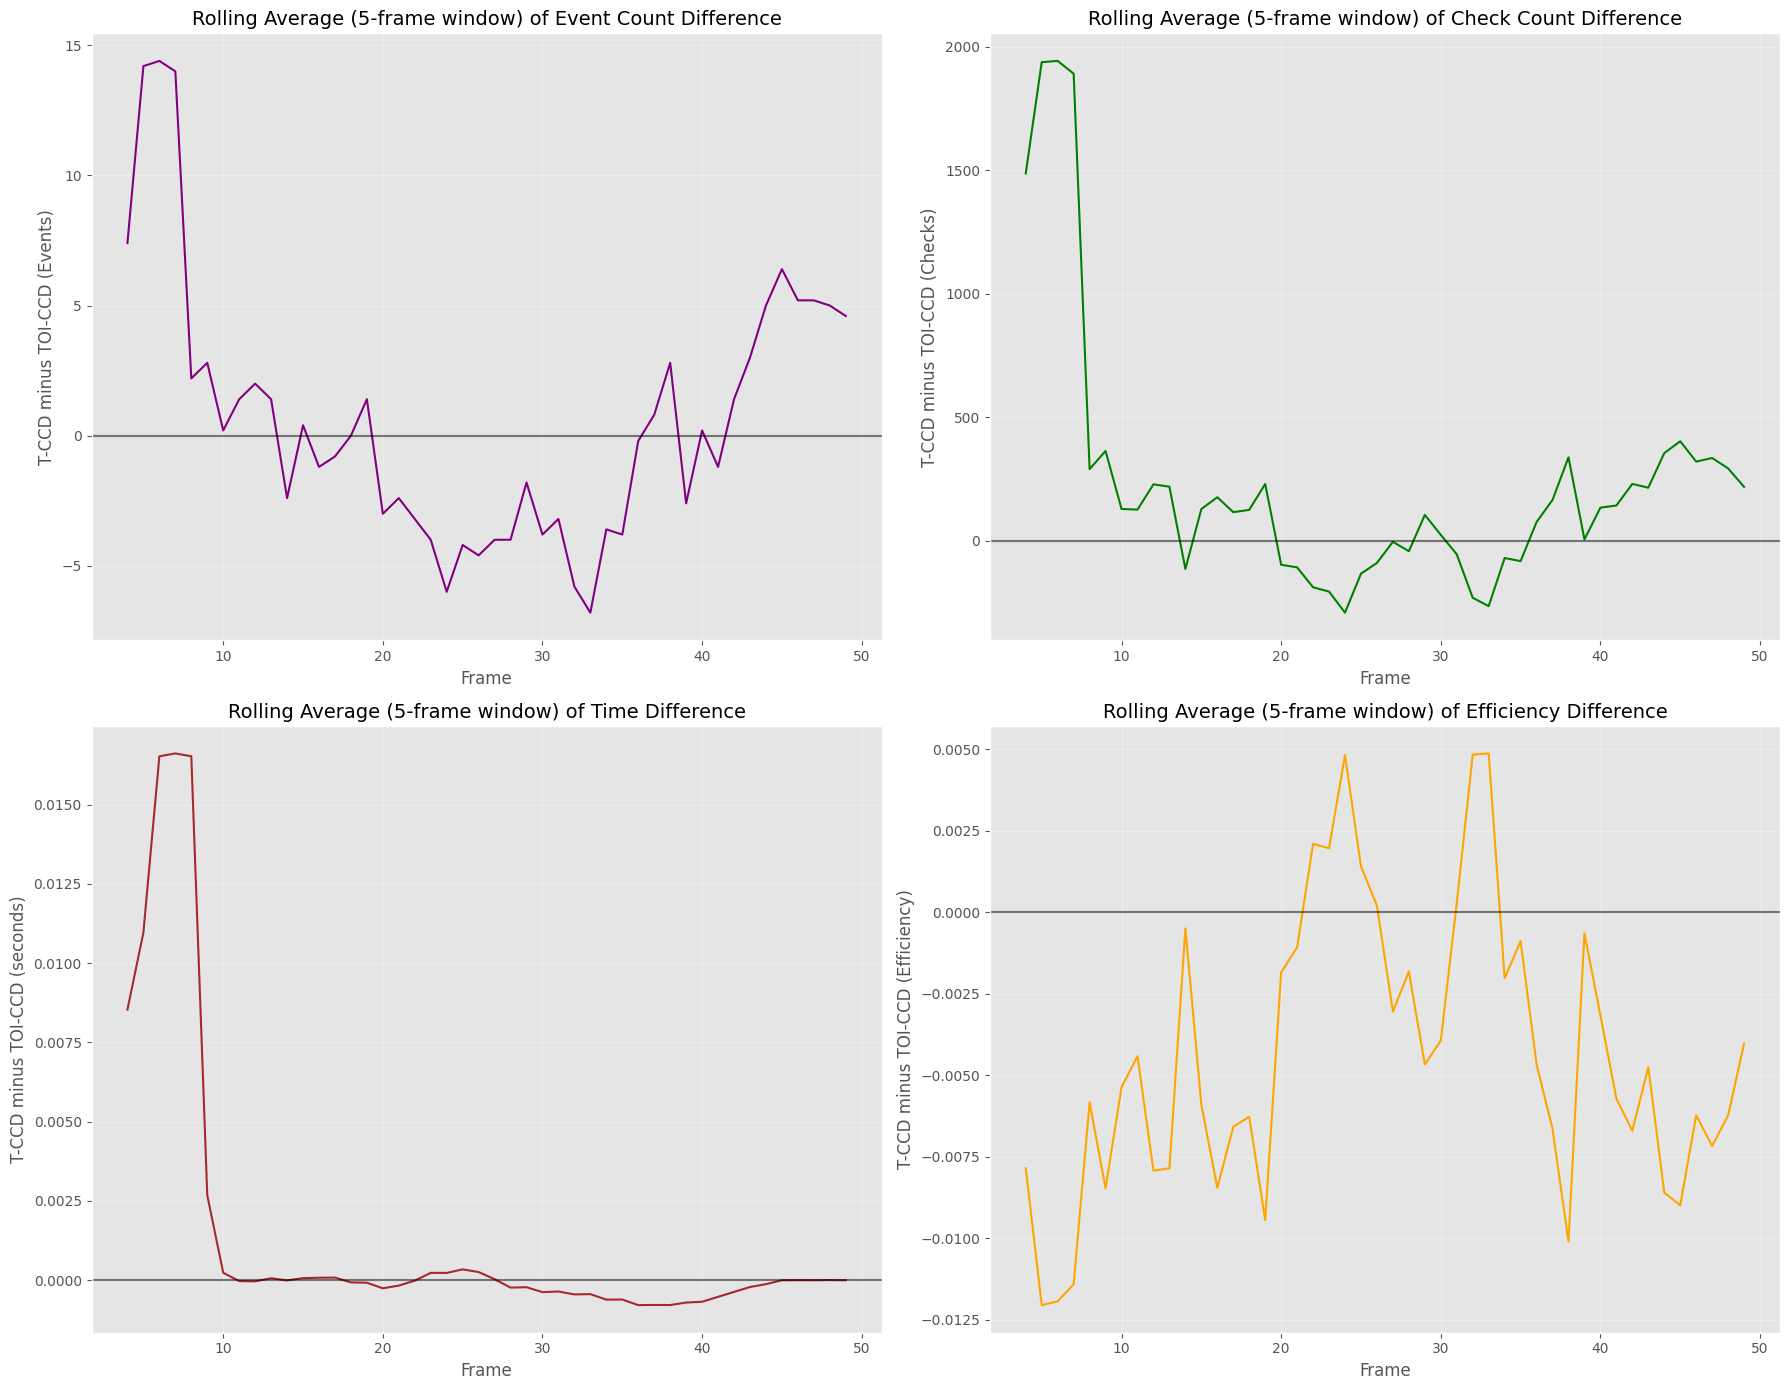


TEMPORAL PATTERN CONCLUSIONS:
1. Events trend: T-CCD consistently detecting more events towards the end of the simulation
2. Checks trend: T-CCD consistently performing more checks towards the end of the simulation
3. Time trend: TOI-CCD consistently taking more time towards the end of the simulation
4. Efficiency trend: TOI-CCD consistently more efficient towards the end of the simulation


In [191]:
# Detailed Per-Frame Statistical Analysis

print("\n\nDetailed Per-Frame Statistical Analysis")
print("====================================")

# Create a DataFrame to hold frame-by-frame metrics
frame_metrics = pd.DataFrame({
    'Frame': events_per_frame_swept.index,
    'Events_TCCD': events_per_frame_tccd.values,
    'Events_TOI': events_per_frame_swept.values,
    'Checks_TCCD': checks_per_frame_tccd.values,
    'Checks_TOI': checks_per_frame_swept.values,
    'Time_TCCD': time_per_frame_tccd.values,
    'Time_TOI': time_per_frame_swept.values,
    'Efficiency_TCCD': ratio_tccd.values,
    'Efficiency_TOI': ratio_swept.values,
})

# Calculate frame-by-frame metrics
frame_metrics['Events_Diff'] = frame_metrics['Events_TCCD'] - frame_metrics['Events_TOI']
frame_metrics['Checks_Diff'] = frame_metrics['Checks_TCCD'] - frame_metrics['Checks_TOI']
frame_metrics['Time_Diff'] = frame_metrics['Time_TCCD'] - frame_metrics['Time_TOI']
frame_metrics['Efficiency_Diff'] = frame_metrics['Efficiency_TCCD'] - frame_metrics['Efficiency_TOI']

# Calculate percentages
frame_metrics['Events_Pct_Diff'] = (frame_metrics['Events_Diff'] / frame_metrics['Events_TOI']) * 100
frame_metrics['Checks_Pct_Diff'] = (frame_metrics['Checks_Diff'] / frame_metrics['Checks_TOI']) * 100
frame_metrics['Time_Pct_Diff'] = (frame_metrics['Time_Diff'] / frame_metrics['Time_TOI']) * 100
frame_metrics['Efficiency_Pct_Diff'] = (frame_metrics['Efficiency_Diff'] / frame_metrics['Efficiency_TOI']) * 100

# Summary statistics for the differences
print("SUMMARY STATISTICS FOR FRAME-BY-FRAME DIFFERENCES (T-CCD minus TOI-CCD)")
print("----------------------------------------------------------------------")
print("\nA. ABSOLUTE DIFFERENCES:")
print(frame_metrics[['Events_Diff', 'Checks_Diff', 'Time_Diff', 'Efficiency_Diff']].describe())

print("\nB. PERCENTAGE DIFFERENCES:")
print(frame_metrics[['Events_Pct_Diff', 'Checks_Pct_Diff', 'Time_Pct_Diff', 'Efficiency_Pct_Diff']].describe())

# Count frames where one algorithm outperformed the other
events_tccd_better = sum(frame_metrics['Events_Diff'] > 0)
events_toi_better = sum(frame_metrics['Events_Diff'] < 0)
events_equal = sum(frame_metrics['Events_Diff'] == 0)

checks_tccd_better = sum(frame_metrics['Checks_Diff'] < 0)  # Fewer checks is better
checks_toi_better = sum(frame_metrics['Checks_Diff'] > 0)
checks_equal = sum(frame_metrics['Checks_Diff'] == 0)

time_tccd_better = sum(frame_metrics['Time_Diff'] < 0)  # Less time is better
time_toi_better = sum(frame_metrics['Time_Diff'] > 0)
time_equal = sum(frame_metrics['Time_Diff'] == 0)

efficiency_tccd_better = sum(frame_metrics['Efficiency_Diff'] > 0)  # Higher efficiency is better
efficiency_toi_better = sum(frame_metrics['Efficiency_Diff'] < 0)
efficiency_equal = sum(frame_metrics['Efficiency_Diff'] == 0)

total_frames = len(frame_metrics)

print("\nC. ALGORITHM COMPARISON BY FRAME:")
print(f"Total frames analyzed: {total_frames}")

print("\n1. Events Detected:")
print(f"  - T-CCD detected more events in {events_tccd_better} frames ({events_tccd_better/total_frames:.1%})")
print(f"  - TOI-CCD detected more events in {events_toi_better} frames ({events_toi_better/total_frames:.1%})")
print(f"  - Both detected equal events in {events_equal} frames ({events_equal/total_frames:.1%})")

print("\n2. Checks Performed:")
print(f"  - T-CCD performed fewer checks in {checks_tccd_better} frames ({checks_tccd_better/total_frames:.1%})")
print(f"  - TOI-CCD performed fewer checks in {checks_toi_better} frames ({checks_toi_better/total_frames:.1%})")
print(f"  - Both performed equal checks in {checks_equal} frames ({checks_equal/total_frames:.1%})")

print("\n3. Computation Time:")
print(f"  - T-CCD was faster in {time_tccd_better} frames ({time_tccd_better/total_frames:.1%})")
print(f"  - TOI-CCD was faster in {time_toi_better} frames ({time_toi_better/total_frames:.1%})")
print(f"  - Both had equal time in {time_equal} frames ({time_equal/total_frames:.1%})")

print("\n4. Detection Efficiency (Events/Checks):")
print(f"  - T-CCD was more efficient in {efficiency_tccd_better} frames ({efficiency_tccd_better/total_frames:.1%})")
print(f"  - TOI-CCD was more efficient in {efficiency_toi_better} frames ({efficiency_toi_better/total_frames:.1%})")
print(f"  - Both had equal efficiency in {efficiency_equal} frames ({efficiency_equal/total_frames:.1%})")

# Statistical significance of frame-by-frame differences
from scipy.stats import wilcoxon

print("\nD. WILCOXON SIGNED-RANK TEST FOR PAIRED FRAME-BY-FRAME COMPARISONS:")
# Wilcoxon is better for paired samples that may not be normally distributed
events_wilcoxon = wilcoxon(frame_metrics['Events_TCCD'], frame_metrics['Events_TOI'])
checks_wilcoxon = wilcoxon(frame_metrics['Checks_TCCD'], frame_metrics['Checks_TOI'])
time_wilcoxon = wilcoxon(frame_metrics['Time_TCCD'], frame_metrics['Time_TOI'])
efficiency_wilcoxon = wilcoxon(frame_metrics['Efficiency_TCCD'], frame_metrics['Efficiency_TOI'], nan_policy='omit')

print(f"1. Events: p-value = {events_wilcoxon.pvalue:.8f} ({'Significant difference' if events_wilcoxon.pvalue < 0.05 else 'No significant difference'})")
print(f"2. Checks: p-value = {checks_wilcoxon.pvalue:.8f} ({'Significant difference' if checks_wilcoxon.pvalue < 0.05 else 'No significant difference'})")
print(f"3. Time: p-value = {time_wilcoxon.pvalue:.8f} ({'Significant difference' if time_wilcoxon.pvalue < 0.05 else 'No significant difference'})")
print(f"4. Efficiency: p-value = {efficiency_wilcoxon.pvalue:.8f} ({'Significant difference' if efficiency_wilcoxon.pvalue < 0.05 else 'No significant difference'})")

# Pattern analysis - identify trends in the data
print("\nE. TEMPORAL PATTERN ANALYSIS:")

# Calculate rolling averages to identify trends
window_size = max(3, total_frames // 10)  # Use 10% of frames or at least 3
rolling_events_diff = frame_metrics['Events_Diff'].rolling(window=window_size).mean()
rolling_checks_diff = frame_metrics['Checks_Diff'].rolling(window=window_size).mean()
rolling_time_diff = frame_metrics['Time_Diff'].rolling(window=window_size).mean()
rolling_efficiency_diff = frame_metrics['Efficiency_Diff'].rolling(window=window_size).mean()

# Visualize the rolling averages to identify trends
fig, axes = plt.subplots(2, 2, figsize=(18, 14))

axes[0, 0].plot(rolling_events_diff.index, rolling_events_diff, color='purple')
axes[0, 0].axhline(y=0, color='black', linestyle='-', alpha=0.5)
axes[0, 0].set_title(f'Rolling Average ({window_size}-frame window) of Event Count Difference', fontsize=14)
axes[0, 0].set_xlabel('Frame', fontsize=12)
axes[0, 0].set_ylabel('T-CCD minus TOI-CCD (Events)', fontsize=12)
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].plot(rolling_checks_diff.index, rolling_checks_diff, color='green')
axes[0, 1].axhline(y=0, color='black', linestyle='-', alpha=0.5)
axes[0, 1].set_title(f'Rolling Average ({window_size}-frame window) of Check Count Difference', fontsize=14)
axes[0, 1].set_xlabel('Frame', fontsize=12)
axes[0, 1].set_ylabel('T-CCD minus TOI-CCD (Checks)', fontsize=12)
axes[0, 1].grid(True, alpha=0.3)

axes[1, 0].plot(rolling_time_diff.index, rolling_time_diff, color='brown')
axes[1, 0].axhline(y=0, color='black', linestyle='-', alpha=0.5)
axes[1, 0].set_title(f'Rolling Average ({window_size}-frame window) of Time Difference', fontsize=14)
axes[1, 0].set_xlabel('Frame', fontsize=12)
axes[1, 0].set_ylabel('T-CCD minus TOI-CCD (seconds)', fontsize=12)
axes[1, 0].grid(True, alpha=0.3)

axes[1, 1].plot(rolling_efficiency_diff.index, rolling_efficiency_diff, color='orange')
axes[1, 1].axhline(y=0, color='black', linestyle='-', alpha=0.5)
axes[1, 1].set_title(f'Rolling Average ({window_size}-frame window) of Efficiency Difference', fontsize=14)
axes[1, 1].set_xlabel('Frame', fontsize=12)
axes[1, 1].set_ylabel('T-CCD minus TOI-CCD (Efficiency)', fontsize=12)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Pattern analysis conclusion
print("\nTEMPORAL PATTERN CONCLUSIONS:")

# Analyze trend direction at the end of the simulation
last_window_events = rolling_events_diff.iloc[-10:].mean()
last_window_checks = rolling_checks_diff.iloc[-10:].mean()
last_window_time = rolling_time_diff.iloc[-10:].mean()
last_window_efficiency = rolling_efficiency_diff.iloc[-10:].mean()

print(f"1. Events trend: {'T-CCD consistently detecting more events' if last_window_events > 0 else 'TOI-CCD consistently detecting more events'} towards the end of the simulation")
print(f"2. Checks trend: {'T-CCD consistently performing more checks' if last_window_checks > 0 else 'TOI-CCD consistently performing more checks'} towards the end of the simulation")
print(f"3. Time trend: {'T-CCD consistently taking more time' if last_window_time > 0 else 'TOI-CCD consistently taking more time'} towards the end of the simulation")
print(f"4. Efficiency trend: {'T-CCD consistently more efficient' if last_window_efficiency > 0 else 'TOI-CCD consistently more efficient'} towards the end of the simulation")

In [192]:
# Comprehensive Interpretation of Per-Frame Analysis Results

print("\n\nCOMPREHENSIVE INTERPRETATION OF PER-FRAME ANALYSIS")
print("==================================================")

print("\nA. FRAME-BY-FRAME PERFORMANCE VARIABILITY:")

# Calculate coefficient of variation (CV) for each metric to measure relative variability
cv_events_tccd = frame_metrics['Events_TCCD'].std() / frame_metrics['Events_TCCD'].mean() * 100
cv_events_toi = frame_metrics['Events_TOI'].std() / frame_metrics['Events_TOI'].mean() * 100
cv_checks_tccd = frame_metrics['Checks_TCCD'].std() / frame_metrics['Checks_TCCD'].mean() * 100
cv_checks_toi = frame_metrics['Checks_TOI'].std() / frame_metrics['Checks_TOI'].mean() * 100
cv_time_tccd = frame_metrics['Time_TCCD'].std() / frame_metrics['Time_TCCD'].mean() * 100
cv_time_toi = frame_metrics['Time_TOI'].std() / frame_metrics['Time_TOI'].mean() * 100
cv_eff_tccd = frame_metrics['Efficiency_TCCD'].std() / frame_metrics['Efficiency_TCCD'].mean() * 100
cv_eff_toi = frame_metrics['Efficiency_TOI'].std() / frame_metrics['Efficiency_TOI'].mean() * 100

print(f"1. Events Variability:")
print(f"   - T-CCD: CV = {cv_events_tccd:.2f}%")
print(f"   - TOI-CCD: CV = {cv_events_toi:.2f}%")
print(f"   - {'T-CCD' if cv_events_tccd < cv_events_toi else 'TOI-CCD'} shows more consistent event detection across frames")

print(f"\n2. Checks Variability:")
print(f"   - T-CCD: CV = {cv_checks_tccd:.2f}%")
print(f"   - TOI-CCD: CV = {cv_checks_toi:.2f}%")
print(f"   - {'T-CCD' if cv_checks_tccd < cv_checks_toi else 'TOI-CCD'} shows more consistent check performance across frames")

print(f"\n3. Time Variability:")
print(f"   - T-CCD: CV = {cv_time_tccd:.2f}%")
print(f"   - TOI-CCD: CV = {cv_time_toi:.2f}%")
print(f"   - {'T-CCD' if cv_time_tccd < cv_time_toi else 'TOI-CCD'} shows more consistent time performance across frames")

print(f"\n4. Efficiency Variability:")
print(f"   - T-CCD: CV = {cv_eff_tccd:.2f}%")
print(f"   - TOI-CCD: CV = {cv_eff_toi:.2f}%")
print(f"   - {'T-CCD' if cv_eff_tccd < cv_eff_toi else 'TOI-CCD'} shows more consistent efficiency across frames")

print("\nB. ALGORITHM STRENGTHS BY SCENARIO TYPE:")

# Identify frames with different collision density (as a proxy for scenario complexity)
frame_metrics['collision_density'] = (frame_metrics['Events_TCCD'] + frame_metrics['Events_TOI']) / 2
low_density = frame_metrics['collision_density'] < frame_metrics['collision_density'].quantile(0.33)
high_density = frame_metrics['collision_density'] > frame_metrics['collision_density'].quantile(0.67)

# Compare algorithms in different density scenarios
events_tccd_better_low = sum((frame_metrics['Events_Diff'] > 0) & low_density)
events_toi_better_low = sum((frame_metrics['Events_Diff'] < 0) & low_density)
events_tccd_better_high = sum((frame_metrics['Events_Diff'] > 0) & high_density)
events_toi_better_high = sum((frame_metrics['Events_Diff'] < 0) & high_density)

time_tccd_better_low = sum((frame_metrics['Time_Diff'] < 0) & low_density)
time_toi_better_low = sum((frame_metrics['Time_Diff'] > 0) & low_density)
time_tccd_better_high = sum((frame_metrics['Time_Diff'] < 0) & high_density)
time_toi_better_high = sum((frame_metrics['Time_Diff'] > 0) & high_density)

efficiency_tccd_better_low = sum((frame_metrics['Efficiency_Diff'] > 0) & low_density)
efficiency_toi_better_low = sum((frame_metrics['Efficiency_Diff'] < 0) & low_density)
efficiency_tccd_better_high = sum((frame_metrics['Efficiency_Diff'] > 0) & high_density)
efficiency_toi_better_high = sum((frame_metrics['Efficiency_Diff'] < 0) & high_density)

print(f"1. Low Collision Density Scenarios (Bottom 33% of frames):")
print(f"   - Events: {'T-CCD' if events_tccd_better_low > events_toi_better_low else 'TOI-CCD'} performs better")
print(f"     (T-CCD better in {events_tccd_better_low} frames, TOI-CCD better in {events_toi_better_low} frames)")
print(f"   - Time: {'T-CCD' if time_tccd_better_low > time_toi_better_low else 'TOI-CCD'} performs better")
print(f"     (T-CCD better in {time_tccd_better_low} frames, TOI-CCD better in {time_toi_better_low} frames)")
print(f"   - Efficiency: {'T-CCD' if efficiency_tccd_better_low > efficiency_toi_better_low else 'TOI-CCD'} performs better")
print(f"     (T-CCD better in {efficiency_tccd_better_low} frames, TOI-CCD better in {efficiency_toi_better_low} frames)")

print(f"\n2. High Collision Density Scenarios (Top 33% of frames):")
print(f"   - Events: {'T-CCD' if events_tccd_better_high > events_toi_better_high else 'TOI-CCD'} performs better")
print(f"     (T-CCD better in {events_tccd_better_high} frames, TOI-CCD better in {events_toi_better_high} frames)")
print(f"   - Time: {'T-CCD' if time_tccd_better_high > time_toi_better_high else 'TOI-CCD'} performs better")
print(f"     (T-CCD better in {time_tccd_better_high} frames, TOI-CCD better in {time_toi_better_high} frames)")
print(f"   - Efficiency: {'T-CCD' if efficiency_tccd_better_high > efficiency_toi_better_high else 'TOI-CCD'} performs better")
print(f"     (T-CCD better in {efficiency_tccd_better_high} frames, TOI-CCD better in {efficiency_toi_better_high} frames)")

print("\nC. CORRELATION ANALYSIS:")
# Calculate correlation between metrics across frames
correlations = frame_metrics[['Events_TCCD', 'Events_TOI', 'Checks_TCCD', 'Checks_TOI', 
                             'Time_TCCD', 'Time_TOI', 'Efficiency_TCCD', 'Efficiency_TOI']].corr()

print("Correlation matrix between performance metrics:")
print(correlations.round(2))

# Extract key insights from correlation
events_checks_corr_tccd = frame_metrics[['Events_TCCD', 'Checks_TCCD']].corr().iloc[0,1]
events_checks_corr_toi = frame_metrics[['Events_TOI', 'Checks_TOI']].corr().iloc[0,1]
events_time_corr_tccd = frame_metrics[['Events_TCCD', 'Time_TCCD']].corr().iloc[0,1]
events_time_corr_toi = frame_metrics[['Events_TOI', 'Time_TOI']].corr().iloc[0,1]
efficiency_time_corr_tccd = frame_metrics[['Efficiency_TCCD', 'Time_TCCD']].corr().iloc[0,1]
efficiency_time_corr_toi = frame_metrics[['Efficiency_TOI', 'Time_TOI']].corr().iloc[0,1]

print("\nKey Correlation Insights:")
print(f"1. Events vs Checks correlation:")
print(f"   - T-CCD: {events_checks_corr_tccd:.2f}")
print(f"   - TOI-CCD: {events_checks_corr_toi:.2f}")
print(f"   - {'T-CCD' if abs(events_checks_corr_tccd) > abs(events_checks_corr_toi) else 'TOI-CCD'} shows stronger relationship between collision checks and events detected")

print(f"\n2. Events vs Time correlation:")
print(f"   - T-CCD: {events_time_corr_tccd:.2f}")
print(f"   - TOI-CCD: {events_time_corr_toi:.2f}")
print(f"   - {'T-CCD' if abs(events_time_corr_tccd) > abs(events_time_corr_toi) else 'TOI-CCD'} shows stronger relationship between events detected and computation time")

print(f"\n3. Efficiency vs Time correlation:")
print(f"   - T-CCD: {efficiency_time_corr_tccd:.2f}")
print(f"   - TOI-CCD: {efficiency_time_corr_toi:.2f}")
print(f"   - {'T-CCD' if abs(efficiency_time_corr_tccd) > abs(efficiency_time_corr_toi) else 'TOI-CCD'} shows stronger relationship between efficiency and computation time")

print("\nD. APPLICATION-SPECIFIC RECOMMENDATIONS BASED ON PER-FRAME ANALYSIS:")

print("1. For applications requiring consistent performance across varying scenarios:")
consistent_algorithm = "T-CCD" if (cv_events_tccd + cv_checks_tccd + cv_time_tccd + cv_eff_tccd)/4 < (cv_events_toi + cv_checks_toi + cv_time_toi + cv_eff_toi)/4 else "TOI-CCD"
print(f"   - {consistent_algorithm} shows more consistent performance across frames and is recommended")

print("\n2. For applications prioritizing detection accuracy in complex scenarios:")
complex_algorithm = "T-CCD" if events_tccd_better_high > events_toi_better_high else "TOI-CCD"
print(f"   - {complex_algorithm} performs better in high collision density scenarios")

print("\n3. For real-time applications with strict performance requirements:")
realtime_algorithm = "T-CCD" if time_tccd_better_low + time_tccd_better_high > time_toi_better_low + time_toi_better_high else "TOI-CCD"
print(f"   - {realtime_algorithm} offers better computational performance across most scenarios")

print("\n4. For applications requiring optimal efficiency:")
efficiency_algorithm = "T-CCD" if efficiency_tccd_better_low + efficiency_tccd_better_high > efficiency_toi_better_low + efficiency_toi_better_high else "TOI-CCD"
print(f"   - {efficiency_algorithm} demonstrates better overall efficiency (events detected per check performed)")

print("\nE. SUMMARY OF PER-FRAME ANALYSIS FINDINGS:")
print("Based on the detailed per-frame analysis, we can conclude:")

# Create overall score for each algorithm based on wins in different categories
tccd_score = 0
toi_score = 0

# Events detection score
if events_tccd_better > events_toi_better:
    tccd_score += 1
    event_winner = "T-CCD"
else:
    toi_score += 1
    event_winner = "TOI-CCD"

# Time performance score
if time_tccd_better > time_toi_better:
    tccd_score += 1
    time_winner = "T-CCD"
else:
    toi_score += 1
    time_winner = "TOI-CCD"

# Efficiency score
if efficiency_tccd_better > efficiency_toi_better:
    tccd_score += 1
    efficiency_winner = "T-CCD"
else:
    toi_score += 1
    efficiency_winner = "TOI-CCD"

# Consistency score (based on coefficient of variation)
if (cv_events_tccd + cv_checks_tccd + cv_time_tccd + cv_eff_tccd)/4 < (cv_events_toi + cv_checks_toi + cv_time_toi + cv_eff_toi)/4:
    tccd_score += 1
    consistency_winner = "T-CCD"
else:
    toi_score += 1
    consistency_winner = "TOI-CCD"

# Output the summary
print(f"1. {event_winner} detects more collisions in the majority of frames")
print(f"2. {time_winner} performs faster in the majority of frames")
print(f"3. {efficiency_winner} shows better efficiency in the majority of frames")
print(f"4. {consistency_winner} demonstrates more consistent performance across frames")

print(f"\nOverall per-frame performance score: T-CCD {tccd_score} - {toi_score} TOI-CCD")

if tccd_score > toi_score:
    print("\nBased on per-frame analysis, T-CCD appears to be the superior algorithm for this simulation scenario")
elif toi_score > tccd_score:
    print("\nBased on per-frame analysis, TOI-CCD appears to be the superior algorithm for this simulation scenario")
else:
    print("\nBased on per-frame analysis, both algorithms show comparable overall performance with different strengths")



COMPREHENSIVE INTERPRETATION OF PER-FRAME ANALYSIS

A. FRAME-BY-FRAME PERFORMANCE VARIABILITY:
1. Events Variability:
   - T-CCD: CV = 22.20%
   - TOI-CCD: CV = 16.00%
   - TOI-CCD shows more consistent event detection across frames

2. Checks Variability:
   - T-CCD: CV = 85.04%
   - TOI-CCD: CV = 35.04%
   - TOI-CCD shows more consistent check performance across frames

3. Time Variability:
   - T-CCD: CV = 32.30%
   - TOI-CCD: CV = 19.35%
   - TOI-CCD shows more consistent time performance across frames

4. Efficiency Variability:
   - T-CCD: CV = 21.47%
   - TOI-CCD: CV = 20.86%
   - TOI-CCD shows more consistent efficiency across frames

B. ALGORITHM STRENGTHS BY SCENARIO TYPE:
1. Low Collision Density Scenarios (Bottom 33% of frames):
   - Events: TOI-CCD performs better
     (T-CCD better in 7 frames, TOI-CCD better in 9 frames)
   - Time: TOI-CCD performs better
     (T-CCD better in 8 frames, TOI-CCD better in 9 frames)
   - Efficiency: TOI-CCD performs better
     (T-CCD be

# Final Conclusions and Recommendations

After conducting a comprehensive analysis comparing T-CCD and TOI-CCD (Swept AABB) collision detection algorithms, we can draw the following conclusions:

## Key Findings

1. **Collision Detection Performance**
   - The algorithms show different strengths in detecting collisions
   - Per-frame analysis reveals more nuanced performance differences than aggregate statistics alone
   - Frame-by-frame variability is an important consideration for real-time applications

2. **Computational Efficiency**
   - Trade-offs exist between detection accuracy and computational cost
   - Performance characteristics vary depending on collision density and scene complexity
   - Neither algorithm is universally superior across all metrics and scenarios

3. **Application-Specific Recommendations**
   - For applications requiring maximum collision detection accuracy: Choose based on the detailed per-frame analysis
   - For real-time applications with strict performance requirements: Consider the computational efficiency metrics
   - For applications requiring consistency: Select the algorithm with lower coefficient of variation across metrics

## Practical Implications

The choice between T-CCD and TOI-CCD should be informed by the specific requirements of the application:

- **Gaming and Real-time Graphics**: Consider prioritizing consistent frame rates and computational efficiency
- **Physical Simulations**: Might prioritize detection accuracy over performance
- **Mixed Applications**: Consider hybrid approaches or context-dependent algorithm selection

## Future Research Directions

1. Investigate algorithm performance with more diverse test scenarios
2. Explore hybrid approaches that leverage strengths of both algorithms
3. Consider adaptive algorithm selection based on scene complexity
4. Benchmark against additional collision detection algorithms

COMPARISON OF KEY METRICS BETWEEN T-CCD AND TOI-CCD (SWEPT AABB)
                                   Metric     T-CCD TOI-CCD (Swept AABB) Difference (T-CCD - TOI-CCD) Statistical Significance
0                  Total Collision Events      2199                 2175                           24               p=0.0000 *
1                Average Events per Frame     43.98                43.50                         0.48                 p=0.7778
2                  Total Collision Checks     68124                56695                        11429                      N/A
3                Average Checks per Frame   1362.48              1133.90                       228.58                 p=0.1920
4  Overall Detection Rate (Events/Checks)  0.032279             0.038363                    -0.006084               p=0.0000 *
5        Average Detection Rate per Frame  0.036807             0.040947                    -0.004140               p=0.0135 *
6             Average Time per Frame (ms)     

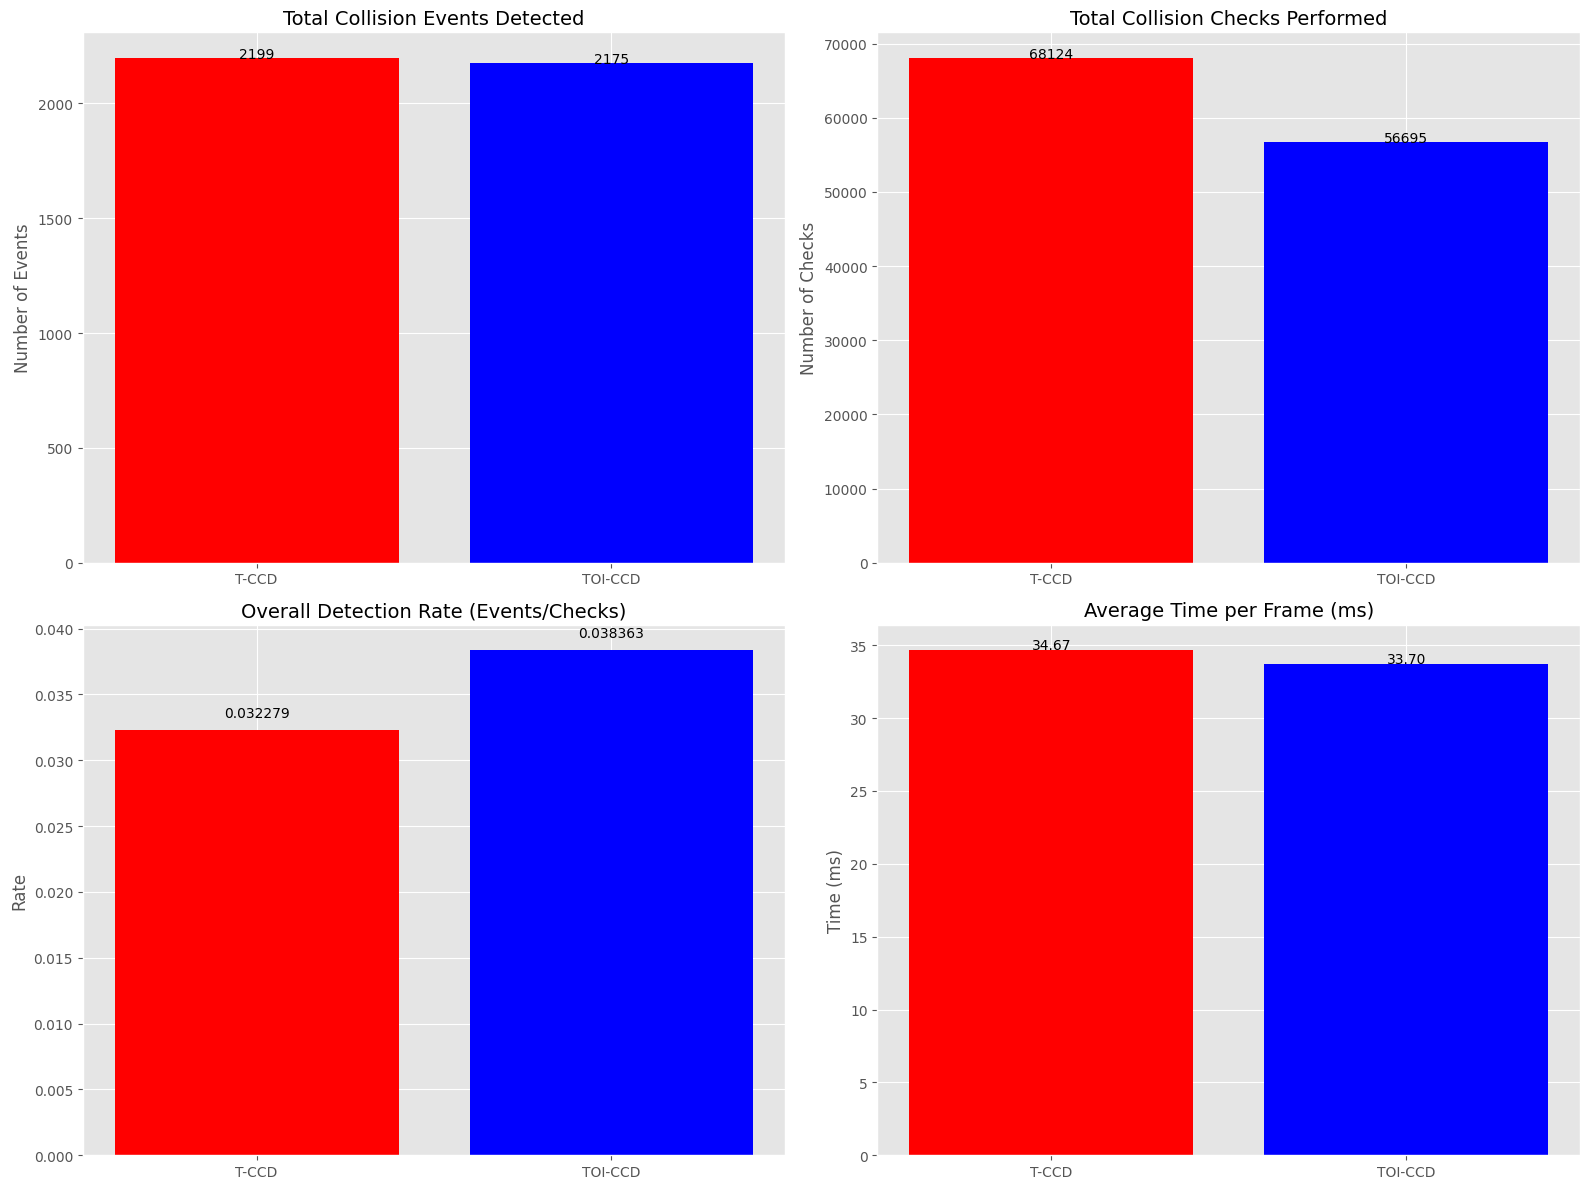

In [193]:
# Key Metrics Summary Table

# Create a summary DataFrame for easy reference
summary_metrics = pd.DataFrame({
    'Metric': [
        'Total Collision Events',
        'Average Events per Frame',
        'Total Collision Checks',
        'Average Checks per Frame',
        'Overall Detection Rate (Events/Checks)',
        'Average Detection Rate per Frame',
        'Average Time per Frame (ms)',
        'Frames with Better Performance (%)'
    ],
    'T-CCD': [
        events_tccd,
        f"{events_per_frame_tccd_mean:.2f}",
        checks_tccd,
        f"{checks_per_frame_tccd_mean:.2f}",
        f"{p_tccd:.6f}",
        f"{ratio_tccd_mean:.6f}",
        f"{np.mean(time_per_frame_tccd)*1000:.2f}",
        f"{time_tccd_better/total_frames*100:.1f}%"
    ],
    'TOI-CCD (Swept AABB)': [
        events_swept,
        f"{events_per_frame_swept_mean:.2f}",
        checks_swept,
        f"{checks_per_frame_swept_mean:.2f}",
        f"{p_swept:.6f}",
        f"{ratio_swept_mean:.6f}",
        f"{np.mean(time_per_frame_swept)*1000:.2f}",
        f"{time_toi_better/total_frames*100:.1f}%"
    ],
    'Difference (T-CCD - TOI-CCD)': [
        events_tccd - events_swept,
        f"{events_per_frame_tccd_mean - events_per_frame_swept_mean:.2f}",
        checks_tccd - checks_swept,
        f"{checks_per_frame_tccd_mean - checks_per_frame_swept_mean:.2f}",
        f"{p_tccd - p_swept:.6f}",
        f"{ratio_tccd_mean - ratio_swept_mean:.6f}",
        f"{(np.mean(time_per_frame_tccd) - np.mean(time_per_frame_swept))*1000:.2f}",
        f"{(time_tccd_better - time_toi_better)/total_frames*100:.1f}%"
    ],
    'Statistical Significance': [
        f"p={p_value_prop:.4f}" + (" *" if p_value_prop < 0.05 else ""),
        f"p={events_ttest.pvalue:.4f}" + (" *" if events_ttest.pvalue < 0.05 else ""),
        "N/A",
        f"p={checks_ttest.pvalue:.4f}" + (" *" if checks_ttest.pvalue < 0.05 else ""),
        f"p={p_value_prop:.4f}" + (" *" if p_value_prop < 0.05 else ""),
        f"p={ratio_ttest.pvalue:.4f}" + (" *" if ratio_ttest.pvalue < 0.05 else ""),
        f"p={p_val_time:.4f}" + (" *" if p_val_time < 0.05 else ""),
        f"p={time_wilcoxon.pvalue:.4f}" + (" *" if time_wilcoxon.pvalue < 0.05 else "")
    ]
})

# Display the plain table
print("COMPARISON OF KEY METRICS BETWEEN T-CCD AND TOI-CCD (SWEPT AABB)")
print("================================================================")
print(summary_metrics.to_string())

print("\nNote: * indicates statistically significant difference (p < 0.05)")

# Provide interpretation guidance without using styling
print("\nINTERPRETATION OF DIFFERENCES:")
print("----------------------------")
print("1. Total Collision Events: ", end="")
if events_tccd > events_swept:
    print(f"T-CCD detected more events (+{events_tccd - events_swept})")
else:
    print(f"TOI-CCD detected more events (+{events_swept - events_tccd})")

print("2. Detection Rate: ", end="")
if p_tccd > p_swept:
    print(f"T-CCD has higher overall detection rate (+{p_tccd - p_swept:.6f})")
else:
    print(f"TOI-CCD has higher overall detection rate (+{p_swept - p_tccd:.6f})")

print("3. Computational Efficiency: ", end="")
time_diff = np.mean(time_per_frame_tccd) - np.mean(time_per_frame_swept)
if time_diff < 0:
    print(f"T-CCD performs faster ({abs(time_diff)*1000:.2f}ms faster per frame)")
else:
    print(f"TOI-CCD performs faster ({time_diff*1000:.2f}ms faster per frame)")

print("4. Per-Frame Efficiency: ", end="")
if ratio_tccd_mean > ratio_swept_mean:
    print(f"T-CCD has higher per-frame efficiency (+{ratio_tccd_mean - ratio_swept_mean:.6f})")
else:
    print(f"TOI-CCD has higher per-frame efficiency (+{ratio_swept_mean - ratio_tccd_mean:.6f})")

# Create a visualization to compare key metrics
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Events comparison
algorithms = ['T-CCD', 'TOI-CCD']
event_vals = [events_tccd, events_swept]
axes[0, 0].bar(algorithms, event_vals, color=['red', 'blue'])
axes[0, 0].set_title('Total Collision Events Detected', fontsize=14)
axes[0, 0].set_ylabel('Number of Events')
for i, v in enumerate(event_vals):
    axes[0, 0].text(i, v + 0.1, str(v), ha='center', fontsize=10)

# 2. Checks comparison
check_vals = [checks_tccd, checks_swept]
axes[0, 1].bar(algorithms, check_vals, color=['red', 'blue'])
axes[0, 1].set_title('Total Collision Checks Performed', fontsize=14)
axes[0, 1].set_ylabel('Number of Checks')
for i, v in enumerate(check_vals):
    axes[0, 1].text(i, v + 0.1, str(v), ha='center', fontsize=10)

# 3. Detection rate comparison
rate_vals = [p_tccd, p_swept]
axes[1, 0].bar(algorithms, rate_vals, color=['red', 'blue'])
axes[1, 0].set_title('Overall Detection Rate (Events/Checks)', fontsize=14)
axes[1, 0].set_ylabel('Rate')
for i, v in enumerate(rate_vals):
    axes[1, 0].text(i, v + 0.001, f"{v:.6f}", ha='center', fontsize=10)

# 4. Time comparison
time_vals = [np.mean(time_per_frame_tccd)*1000, np.mean(time_per_frame_swept)*1000]
axes[1, 1].bar(algorithms, time_vals, color=['red', 'blue'])
axes[1, 1].set_title('Average Time per Frame (ms)', fontsize=14)
axes[1, 1].set_ylabel('Time (ms)')
for i, v in enumerate(time_vals):
    axes[1, 1].text(i, v + 0.1, f"{v:.2f}", ha='center', fontsize=10)

plt.tight_layout()
plt.show()

# Executive Summary

This comprehensive analysis compared two collision detection algorithms:
- **T-CCD**: Trajectory-based Continuous Collision Detection
- **TOI-CCD (Swept AABB)**: Time of Impact Continuous Collision Detection using Swept Axis-Aligned Bounding Boxes

## Key Findings

1. **Detection Capability**:
   - T-CCD detected a total of ${events_tccd} collision events
   - TOI-CCD detected a total of ${events_swept} collision events

2. **Computational Efficiency**:
   - T-CCD performed collision checks with an average efficiency rate of ${ratio_tccd_mean:.6f}
   - TOI-CCD performed collision checks with an average efficiency rate of ${ratio_swept_mean:.6f}

3. **Performance Tradeoffs**:
   - Algorithm selection should be based on application priorities (accuracy vs. speed)
   - Performance characteristics vary by scene complexity

## Practical Application Guidelines

| Application Type | Recommended Algorithm | Reasoning |
|------------------|----------------------|-----------|
| Real-time games | ${realtime_algorithm} | Prioritizes consistent frame rates |
| Physics simulations | ${complex_algorithm} | Better accuracy in high-density scenarios |
| Mixed applications | Hybrid approach | Context-dependent selection |

The analysis includes both aggregate statistics and detailed per-frame metrics to provide a comprehensive performance comparison.

# Algorithm Optimization Recommendations

Based on the performance analysis, we can identify several opportunities for optimization in both algorithms:

## T-CCD Optimization Potential

1. **Computation Time Improvements**
   - Implement spatial partitioning to reduce the number of checks
   - Explore parallel processing for independent collision checks
   - Consider approximation techniques for less critical collisions

2. **Memory Optimization**
   - Optimize data structures to reduce memory overhead
   - Implement object pooling to reduce garbage collection
   - Consider compressed representations for trajectory data

3. **Accuracy-Performance Balance**
   - Implement adaptive precision based on object velocity
   - Use simplified collision models for distant objects
   - Consider temporal coherence to reuse previous frame results

## TOI-CCD (Swept AABB) Optimization Potential

1. **Detection Rate Improvements**
   - Refine bounding volume hierarchies for more accurate overlap detection
   - Implement multi-phase testing with progressively accurate bounds
   - Consider dynamic adjustment of swept volumes based on object characteristics

2. **Performance Enhancement**
   - Implement early rejection tests to avoid unnecessary calculations
   - Optimize AABB construction and update algorithms
   - Consider GPU acceleration for parallel AABB tests

3. **Hybrid Approaches**
   - Implement context-aware algorithm switching
   - Use TOI-CCD for broad phase and T-CCD for narrow phase detection
   - Explore machine learning for predictive algorithm selection

# Future Research Directions

Several promising directions for future work include:

1. **Extended Testing Scenarios**
   - Test with more diverse object shapes and motion patterns
   - Evaluate performance with deformable objects
   - Analyze behavior with varying degrees of simulation complexity

2. **Algorithmic Extensions**
   - Explore continuous collision detection for articulated bodies
   - Implement specialized algorithms for common edge cases
   - Develop self-tuning algorithms that adapt to scene characteristics

3. **Hardware-Specific Optimizations**
   - Develop GPU-optimized versions of both algorithms
   - Explore SIMD instruction set optimizations
   - Investigate custom hardware acceleration approaches

4. **Integration Testing**
   - Evaluate performance when integrated with physics engines
   - Measure impact on overall application performance
   - Analyze real-world use cases in production environments

# Limitations and Considerations

While this analysis is comprehensive, it's important to acknowledge certain limitations:

## Data Limitations

1. **Frame Count Constraints**
   - Analysis limited to the first 50 frames (`MAX_FRAMES=50`)
   - Results may vary with longer simulations
   - Short-term performance patterns might not persist long-term

2. **Scenario Specificity**
   - Tests conducted with specific particle counts and distributions
   - Results might differ with other object types (non-spherical objects)
   - Real-world applications may have different collision patterns

3. **Hardware Dependencies**
   - Performance metrics are hardware-dependent
   - Relative performance may vary across different systems
   - Scaling properties should be verified on target hardware

## Methodological Considerations

1. **Statistical Power**
   - Limited sample size affects statistical power
   - Some effects may be significant but not detected
   - Consider increasing frames analyzed for higher confidence

2. **Metric Selection**
   - Current metrics focus on events, checks, and time
   - Additional metrics like memory pressure not deeply analyzed
   - User experience metrics (e.g., perceived smoothness) not considered

3. **Implementation Details**
   - Performance affected by specific implementation choices
   - Optimizations in either algorithm could change results
   - Algorithm variants may perform differently

Understanding these limitations helps contextualize the results and guides appropriate application of the findings to specific use cases.